<a href="https://colab.research.google.com/github/Sedhupxthi/EDA-21BDS0072/blob/main/EDA_21BDS0072.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Configure plotting styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [15]:
# Load the dataset
file_path = 'BEPS.csv'
try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()

# Display the first few rows
print("\nFirst 5 rows of the dataset:")
print(data.head())


Dataset loaded successfully.

First 5 rows of the dataset:
   rownames              vote  age  economic.cond.national  \
0         1  Liberal Democrat   43                       3   
1         2            Labour   36                       4   
2         3            Labour   35                       4   
3         4            Labour   24                       4   
4         5            Labour   41                       2   

   economic.cond.household  Blair  Hague  Kennedy  Europe  \
0                        3      4      1        4       2   
1                        4      4      4        4       5   
2                        4      5      2        3       3   
3                        2      2      1        3       4   
4                        2      1      1        4       6   

   political.knowledge  gender  
0                    2  female  
1                    2    male  
2                    2    male  
3                    0  female  
4                    2    male  


In [16]:
# Dimensions of the dataset
print("\nDataset Dimensions:")
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

# Column data types and basic info
print("\nDataset Information:")
print(data.info())

# Summary Statistics
print("\nSummary Statistics:")
print(data.describe(include='all'))



Dataset Dimensions:
Rows: 1525, Columns: 11

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   rownames                 1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Kennedy                  1525 non-null   int64 
 8   Europe                   1525 non-null   int64 
 9   political.knowledge      1525 non-null   int64 
 10  gender                   1525 non-null   object
dtypes: int64(9), object(2)
memory usage: 131.2+ KB
None

Summary Statistics:
           rownames    vote          age  economic.cond.nat


Missing Values:
rownames                   0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Kennedy                    0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64


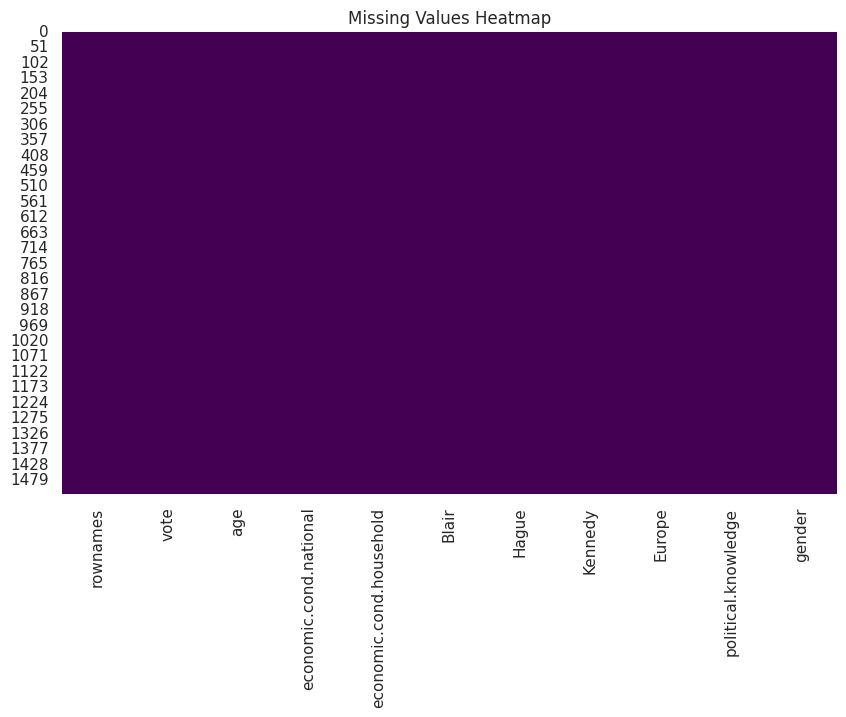

In [17]:
# Check for missing values
print("\nMissing Values:")
missing_data = data.isnull().sum()
print(missing_data)

# Visualize missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [18]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")

# Remove duplicates if any
if duplicates > 0:
    data = data.drop_duplicates()
    print(f"Duplicates removed. New dimensions: {data.shape}")



Duplicate Rows: 0


In [19]:
# Fill missing values for numerical and categorical columns
for col in data.select_dtypes(include=[np.number]):
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mean(), inplace=True)

for col in data.select_dtypes(include=[object]):
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mode()[0], inplace=True)

# Verify missing values after handling
print("\nMissing Values After Handling:")
print(data.isnull().sum())



Missing Values After Handling:
rownames                   0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Kennedy                    0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64


In [20]:
# Automatically standardize column names (lowercase, replace spaces with underscores)
data.columns = data.columns.str.lower().str.replace(' ', '_').str.replace('.', '_')

print("\nRenamed Columns:")
print(data.columns)



Renamed Columns:
Index(['rownames', 'vote', 'age', 'economic_cond_national',
       'economic_cond_household', 'blair', 'hague', 'kennedy', 'europe',
       'political_knowledge', 'gender'],
      dtype='object')


In [21]:
# Identify outliers using IQR
for col in data.select_dtypes(include=[np.number]):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()
    print(f"Outliers in {col}: {outliers}")


Outliers in rownames: 0
Outliers in age: 0
Outliers in economic_cond_national: 37
Outliers in economic_cond_household: 65
Outliers in blair: 0
Outliers in hague: 0
Outliers in kennedy: 0
Outliers in europe: 0
Outliers in political_knowledge: 0



Univariate Analysis - Numerical Features

Statistics for rownames:
Skewness: 0.0, Kurtosis: -1.200001031981094


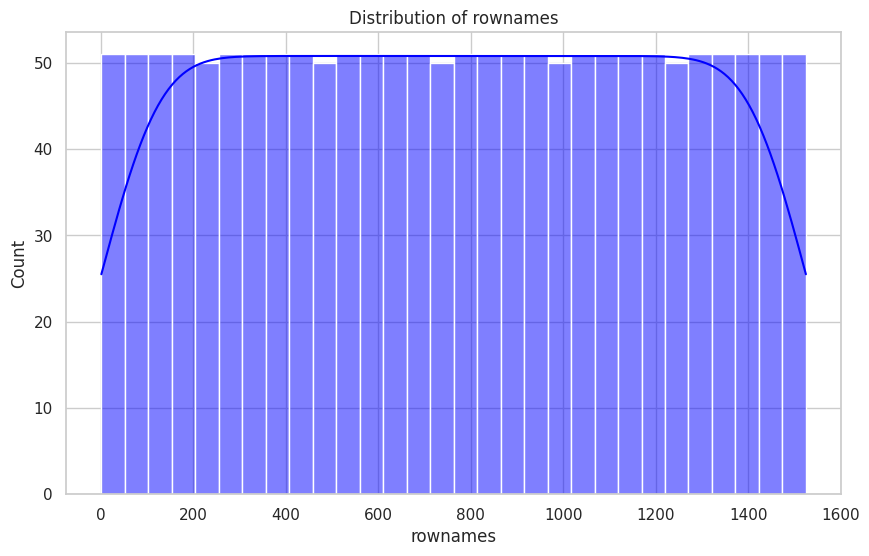


Statistics for age:
Skewness: 0.14447848346551462, Kurtosis: -0.9477269632496834


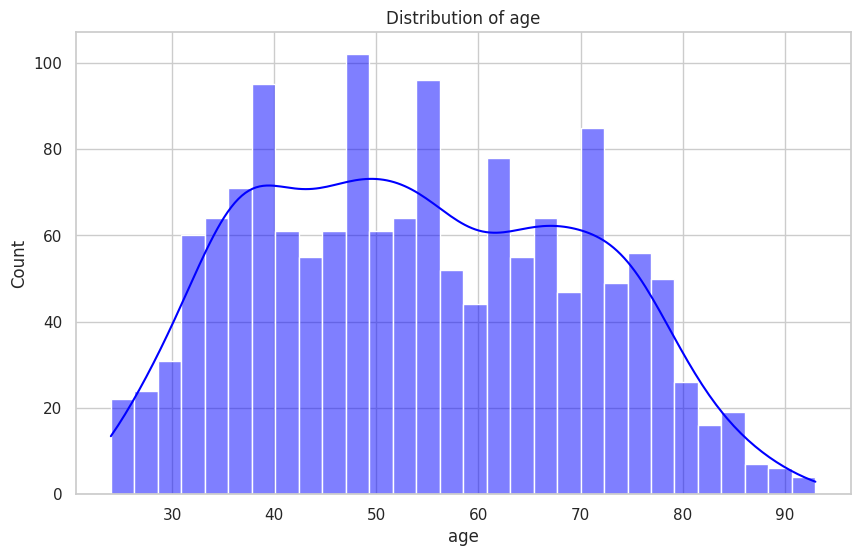


Statistics for economic_cond_national:
Skewness: -0.2402163142518291, Kurtosis: -0.2590870832450891


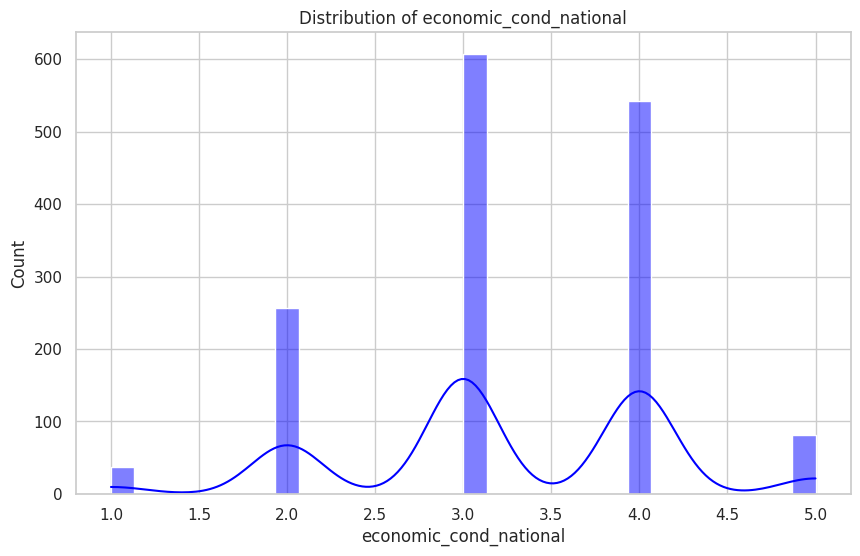


Statistics for economic_cond_household:
Skewness: -0.14940490939119963, Kurtosis: -0.20955763368399438


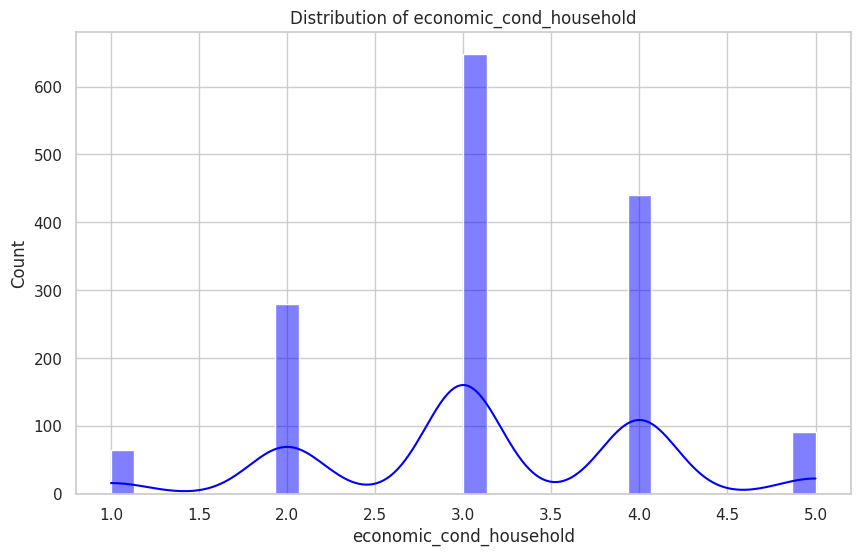


Statistics for blair:
Skewness: -0.5348918666133158, Kurtosis: -1.0660228870170225


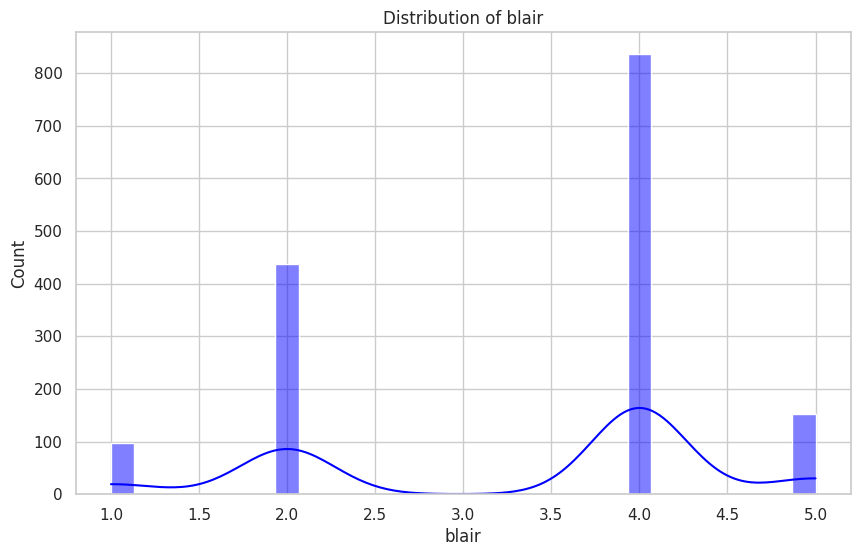


Statistics for hague:
Skewness: 0.15194998016716968, Kurtosis: -1.3911156666526612


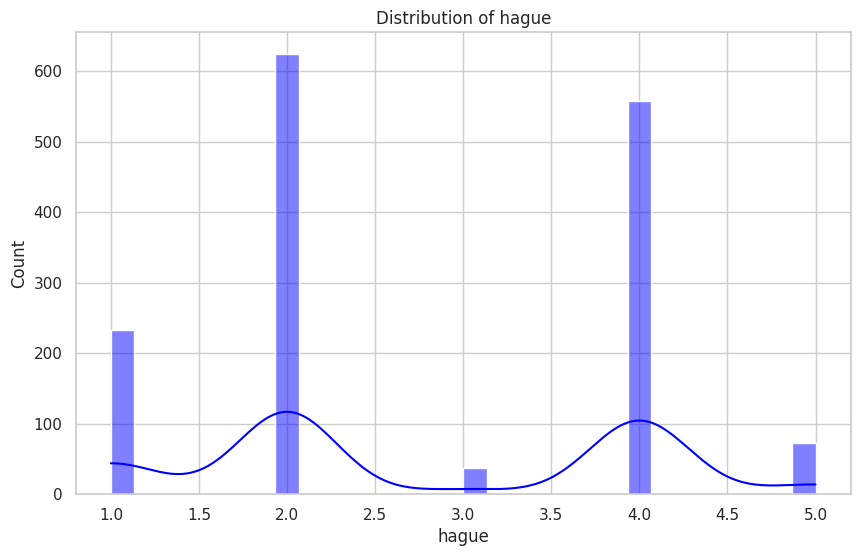


Statistics for kennedy:
Skewness: -0.3755694705431021, Kurtosis: -0.9803612605236234


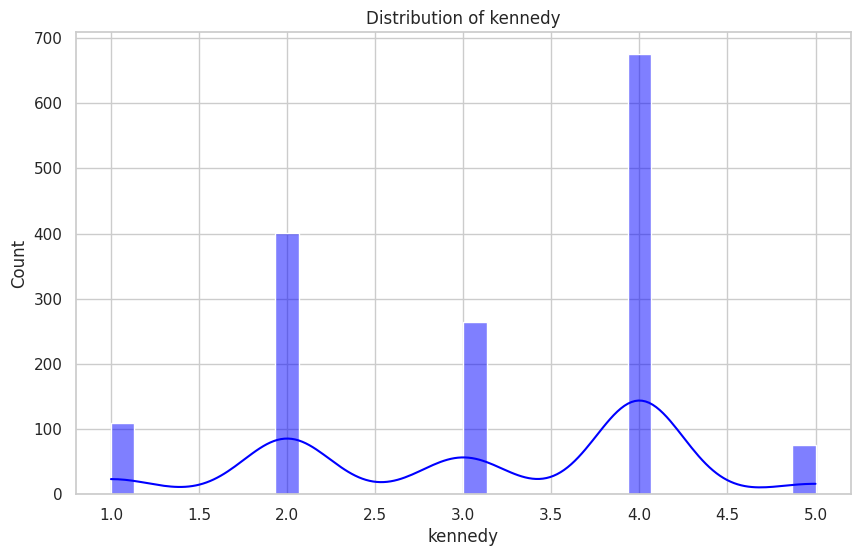


Statistics for europe:
Skewness: -0.13581295528712456, Kurtosis: -1.237717874488492


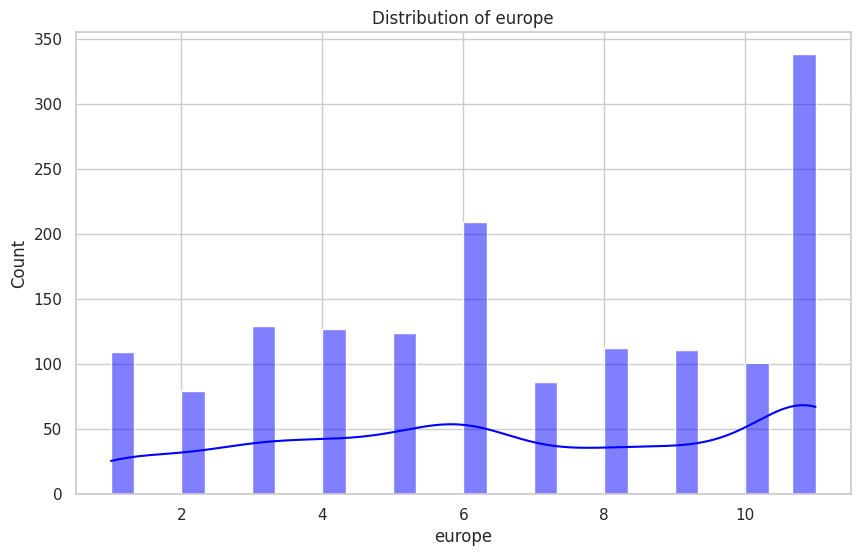


Statistics for political_knowledge:
Skewness: -0.4264178682034399, Kurtosis: -1.2165924068179326


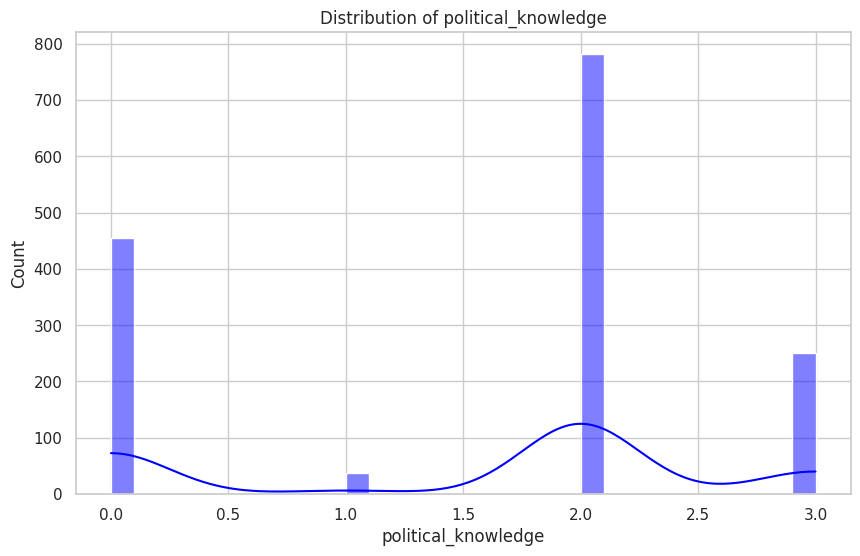


Univariate Analysis - Categorical Features

Value Counts for vote:
vote
Labour              720
Conservative        462
Liberal Democrat    343
Name: count, dtype: int64


<ipython-input-22-e6334fe4820b>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], order=data[col].value_counts().index, palette='viridis')


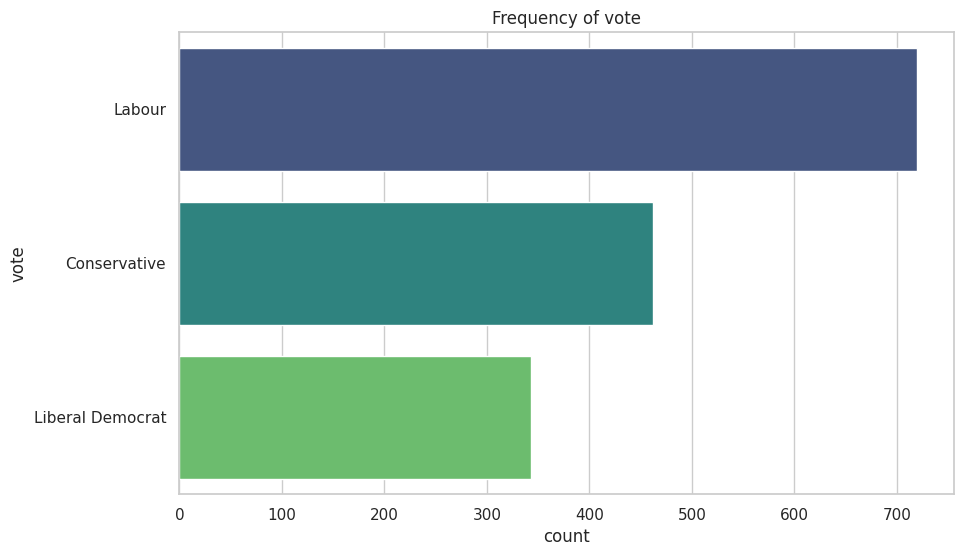


Value Counts for gender:
gender
female    812
male      713
Name: count, dtype: int64


<ipython-input-22-e6334fe4820b>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], order=data[col].value_counts().index, palette='viridis')


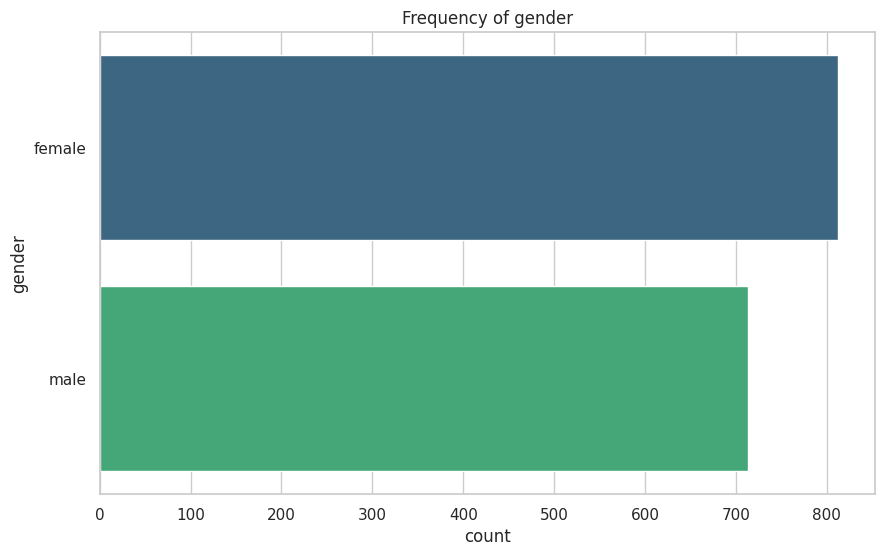

In [22]:
# Numerical Features
print("\nUnivariate Analysis - Numerical Features")
for col in data.select_dtypes(include=[np.number]).columns:
    print(f"\nStatistics for {col}:")
    print(f"Skewness: {skew(data[col])}, Kurtosis: {kurtosis(data[col])}")

    plt.figure()
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.show()

# Categorical Features
print("\nUnivariate Analysis - Categorical Features")
for col in data.select_dtypes(include=[object]).columns:
    print(f"\nValue Counts for {col}:\n{data[col].value_counts()}")

    plt.figure()
    sns.countplot(y=data[col], order=data[col].value_counts().index, palette='viridis')
    plt.title(f"Frequency of {col}")
    plt.show()


<ipython-input-23-6c564fe34194>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


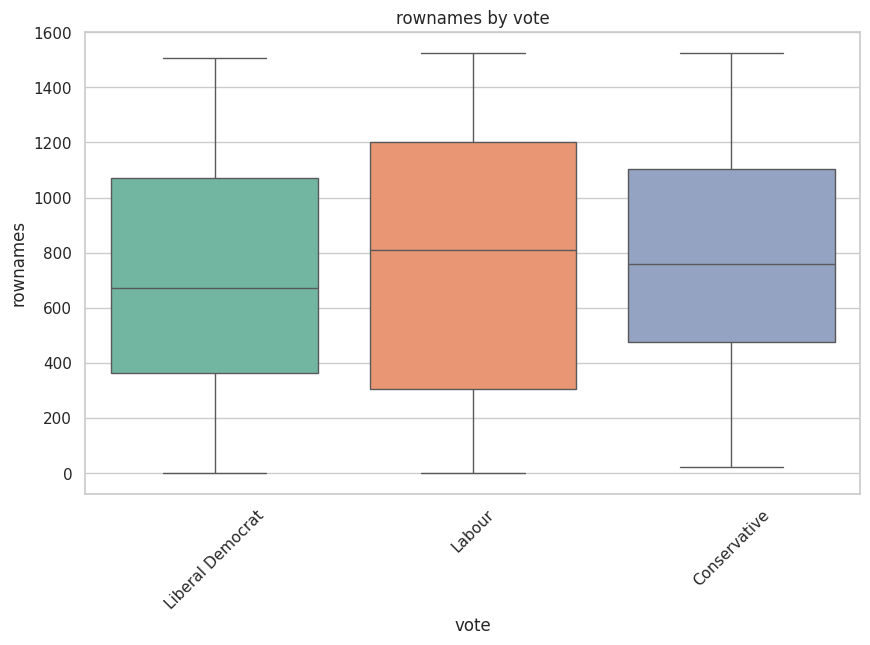

<ipython-input-23-6c564fe34194>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


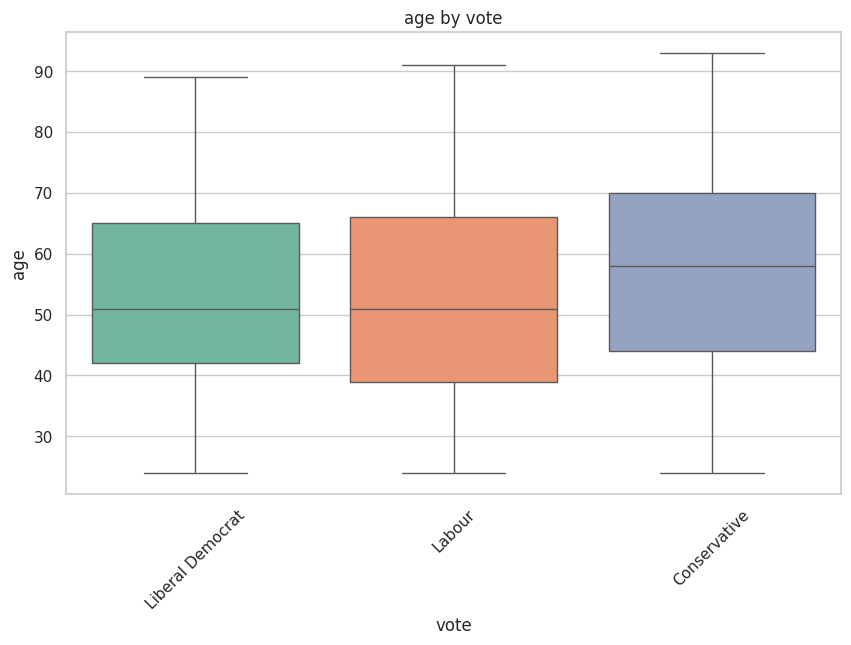

<ipython-input-23-6c564fe34194>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


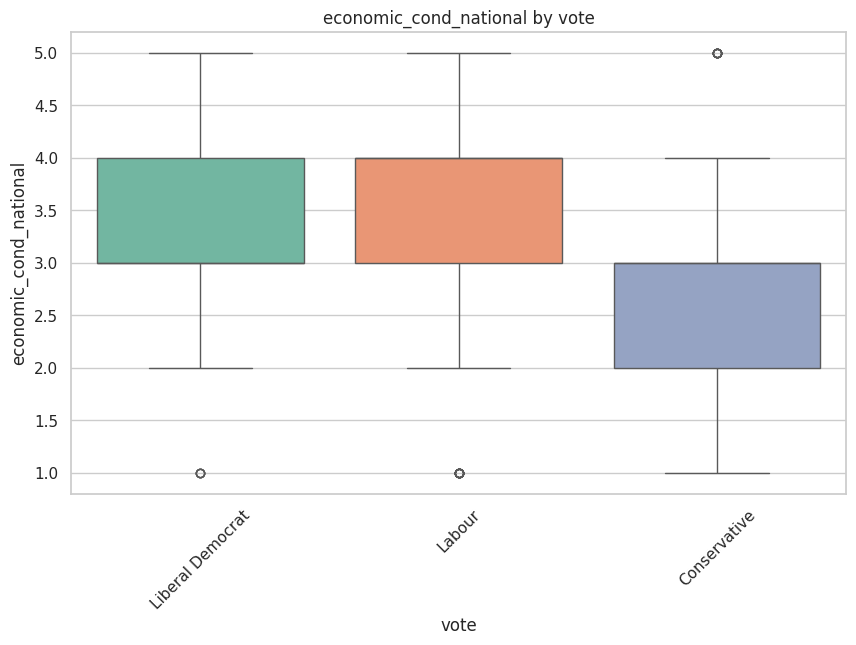

<ipython-input-23-6c564fe34194>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


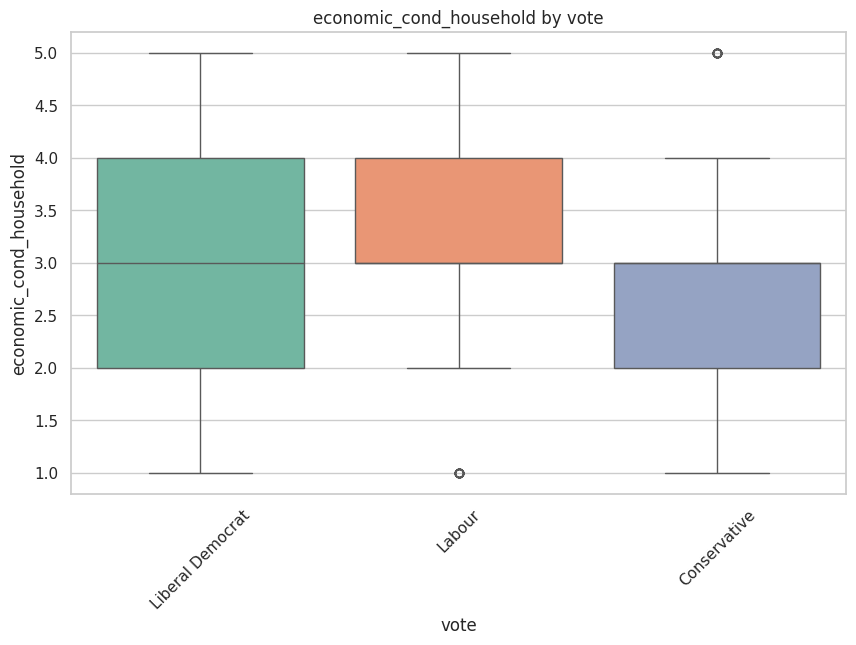

<ipython-input-23-6c564fe34194>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


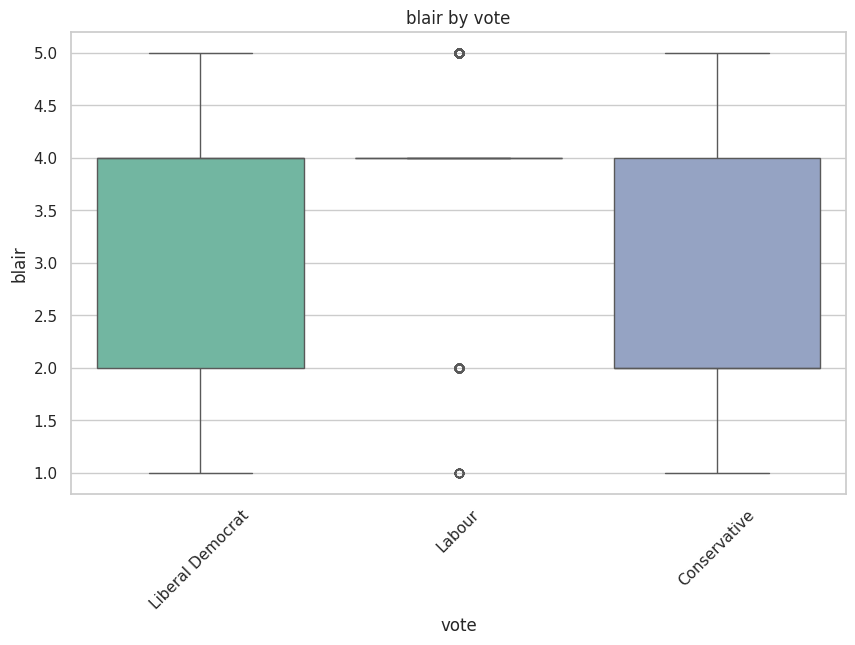

<ipython-input-23-6c564fe34194>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


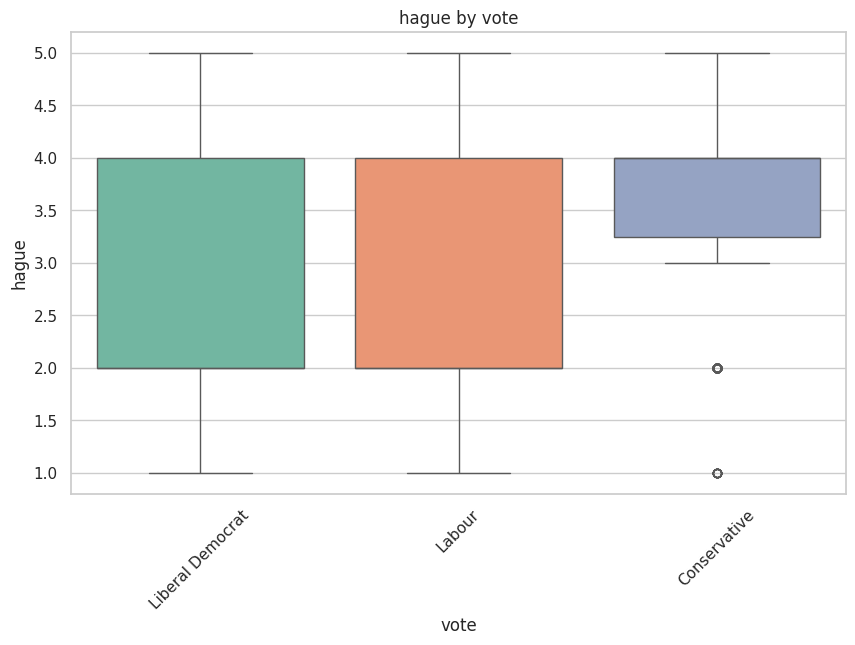

<ipython-input-23-6c564fe34194>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


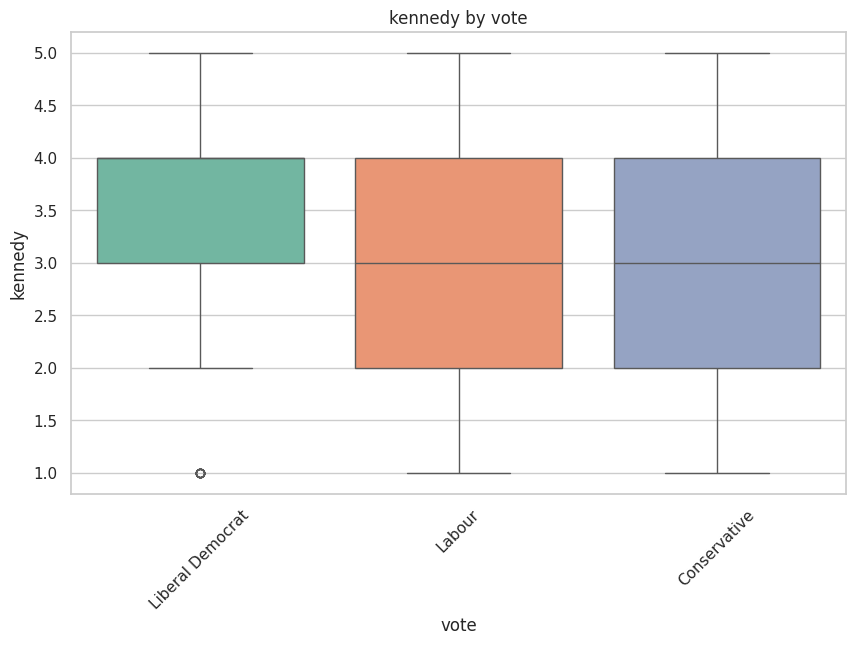

<ipython-input-23-6c564fe34194>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


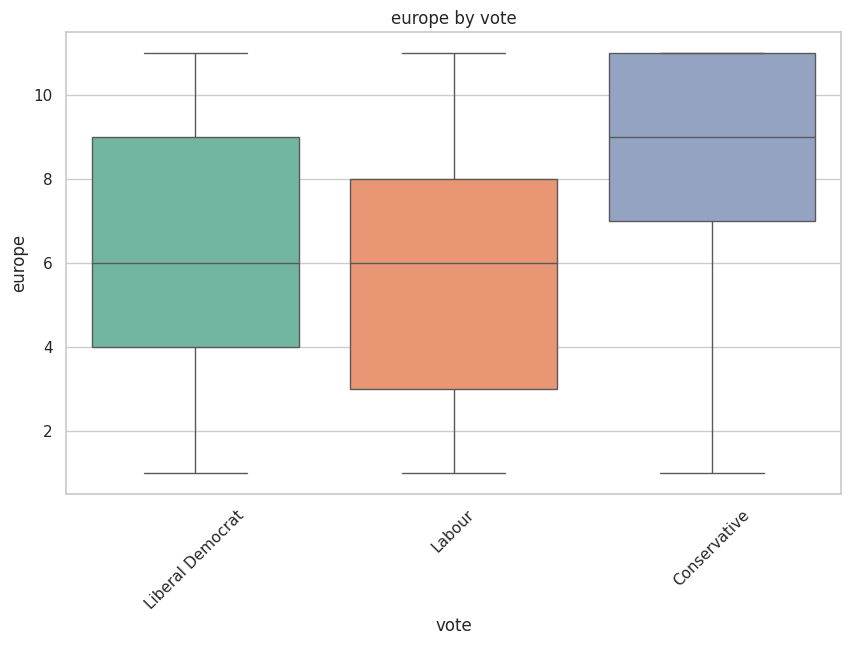

<ipython-input-23-6c564fe34194>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


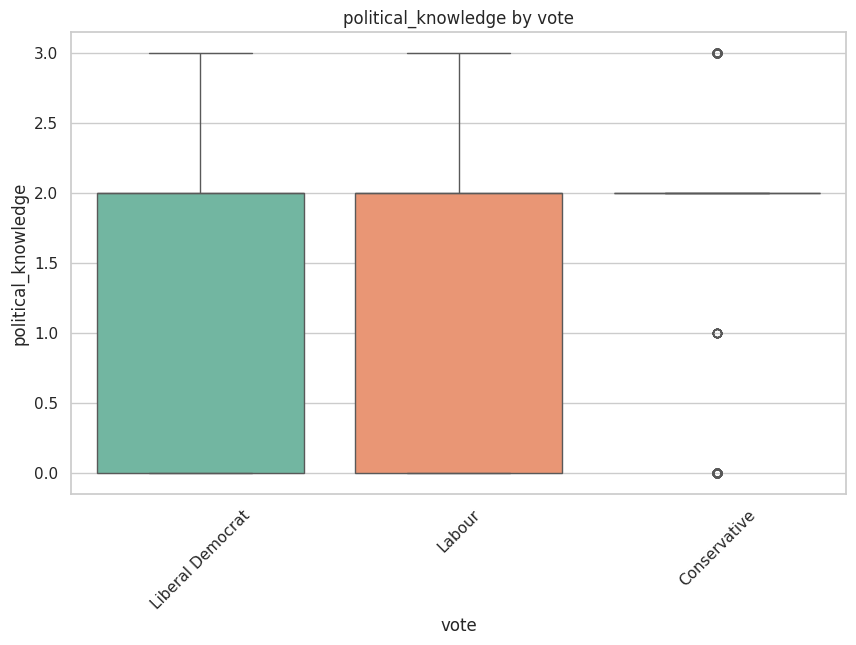

<ipython-input-23-6c564fe34194>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


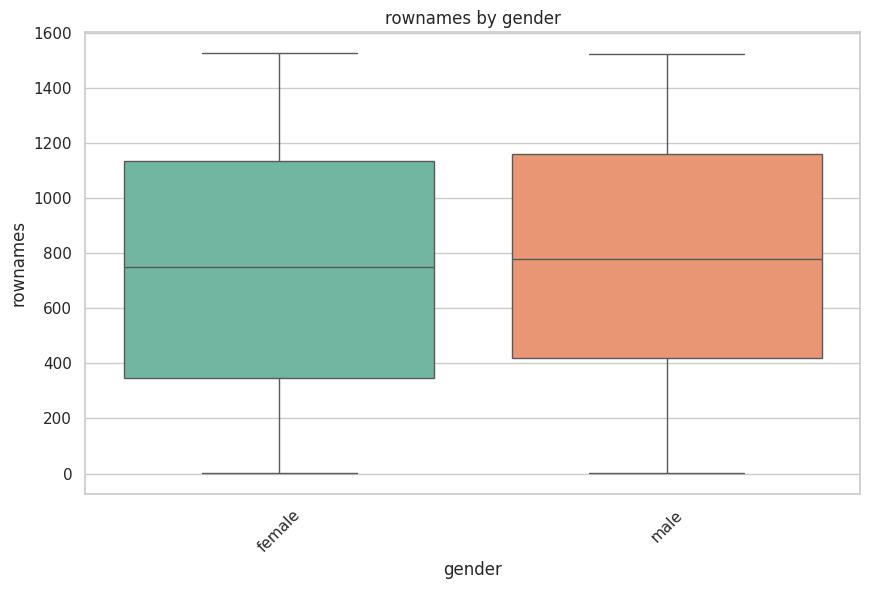

<ipython-input-23-6c564fe34194>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


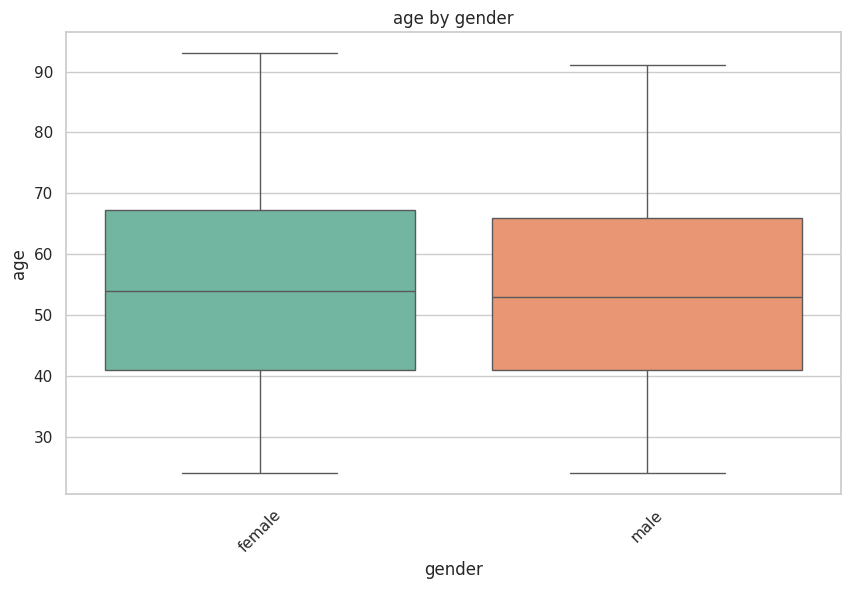

<ipython-input-23-6c564fe34194>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


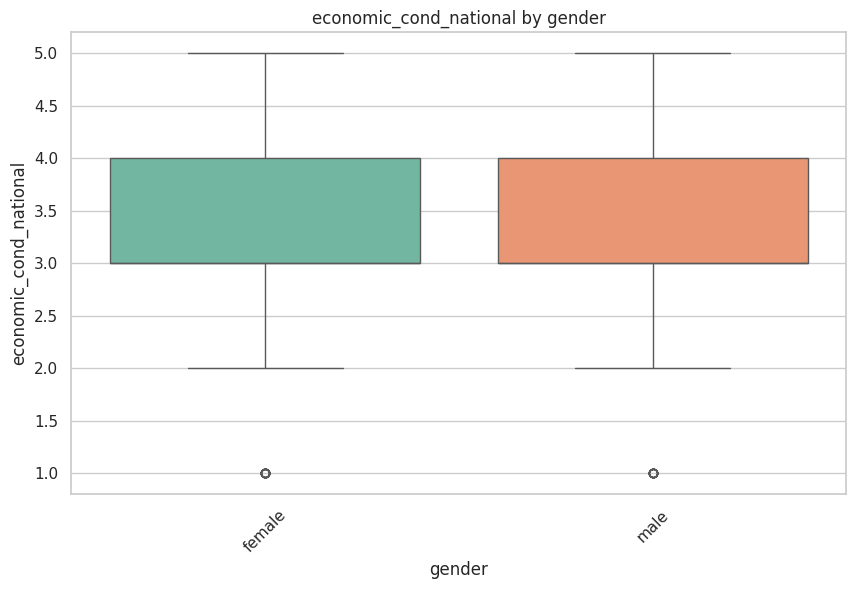

<ipython-input-23-6c564fe34194>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


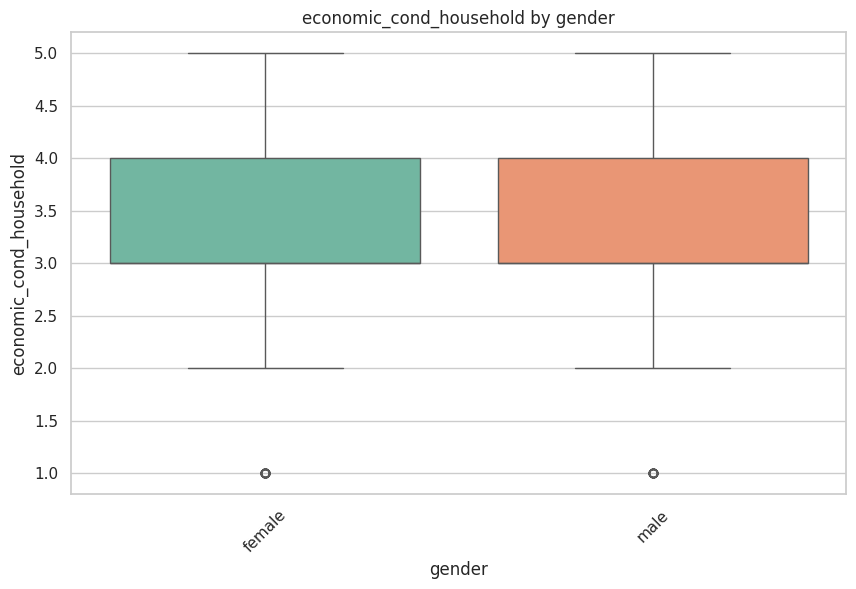

<ipython-input-23-6c564fe34194>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


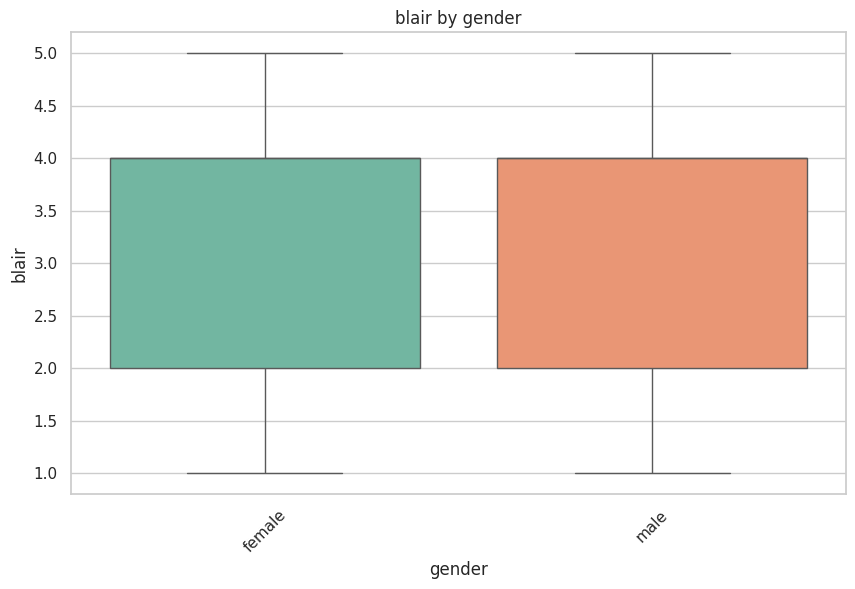

<ipython-input-23-6c564fe34194>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


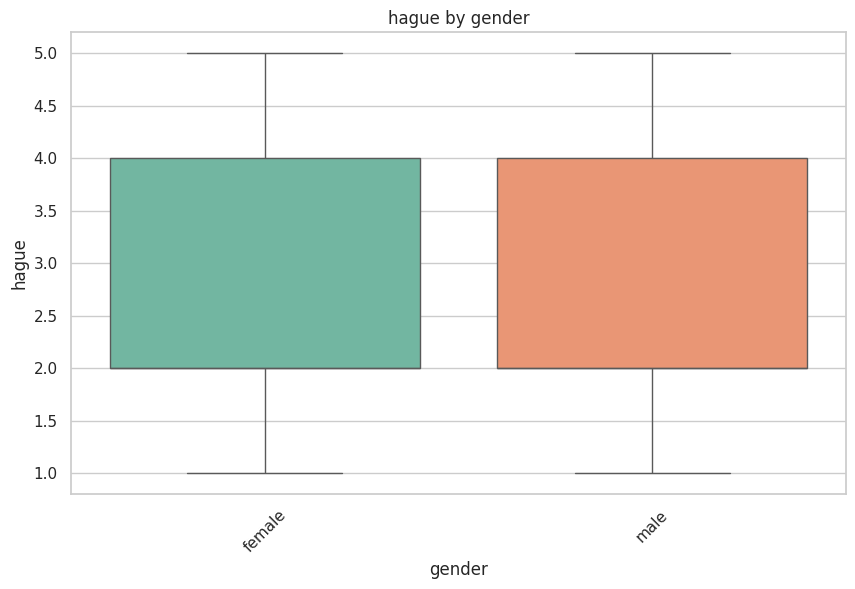

<ipython-input-23-6c564fe34194>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


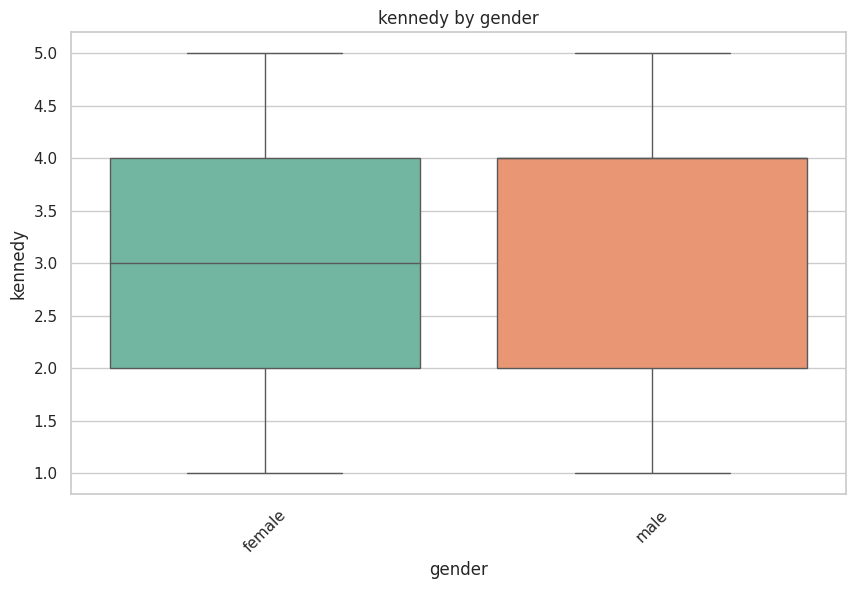

<ipython-input-23-6c564fe34194>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


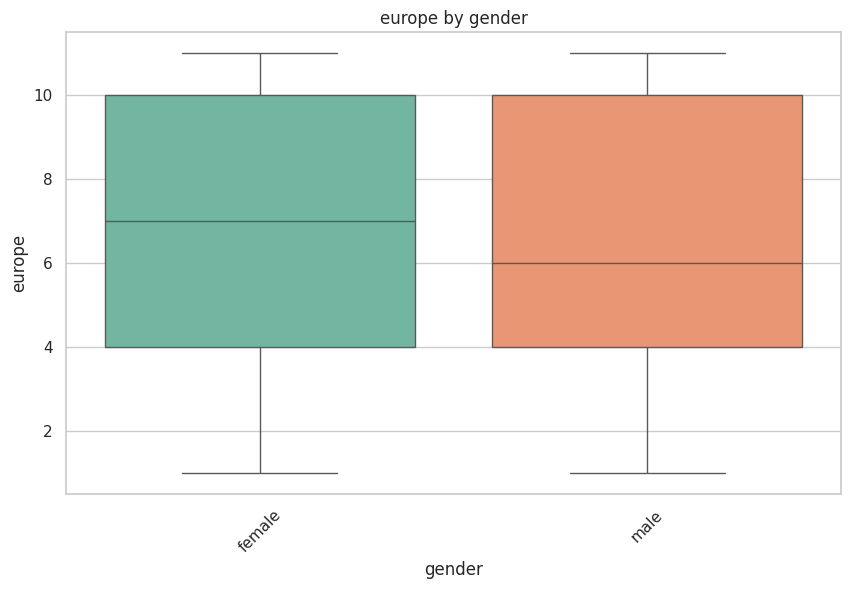

<ipython-input-23-6c564fe34194>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


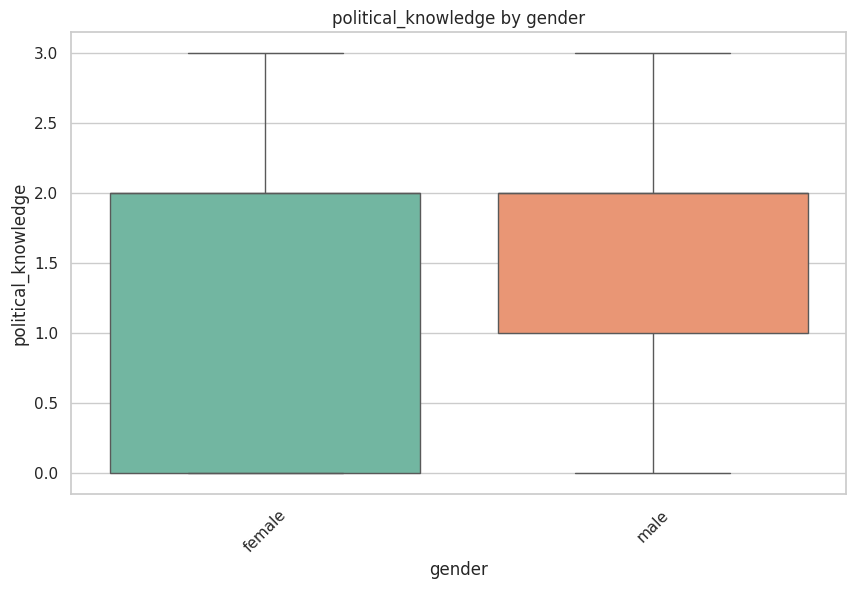

In [23]:


# Numerical vs Categorical
for col in data.select_dtypes(include=[object]).columns:
    for num_col in data.select_dtypes(include=[np.number]).columns:
        plt.figure()
        sns.boxplot(x=data[col], y=data[num_col], palette='Set2')
        plt.title(f"{num_col} by {col}")
        plt.xticks(rotation=45)
        plt.show()



Univariate Analysis - Numerical Features

Statistics for rownames:
Skewness: 0.0, Kurtosis: -1.200001031981094


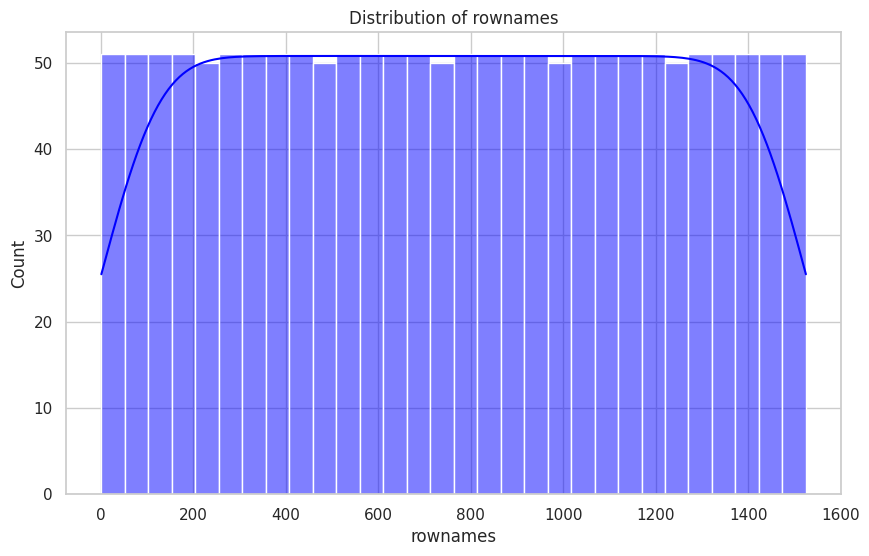


Statistics for age:
Skewness: 0.14447848346551462, Kurtosis: -0.9477269632496834


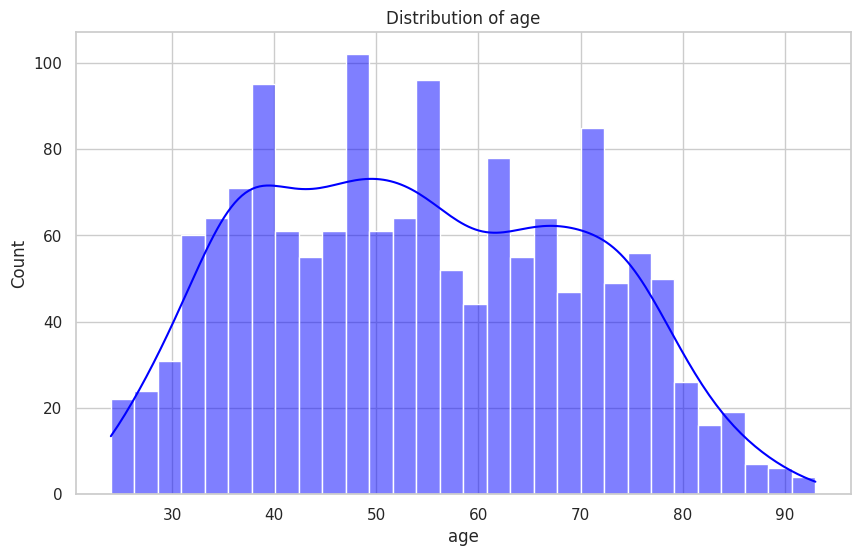


Statistics for economic_cond_national:
Skewness: -0.2402163142518291, Kurtosis: -0.2590870832450891


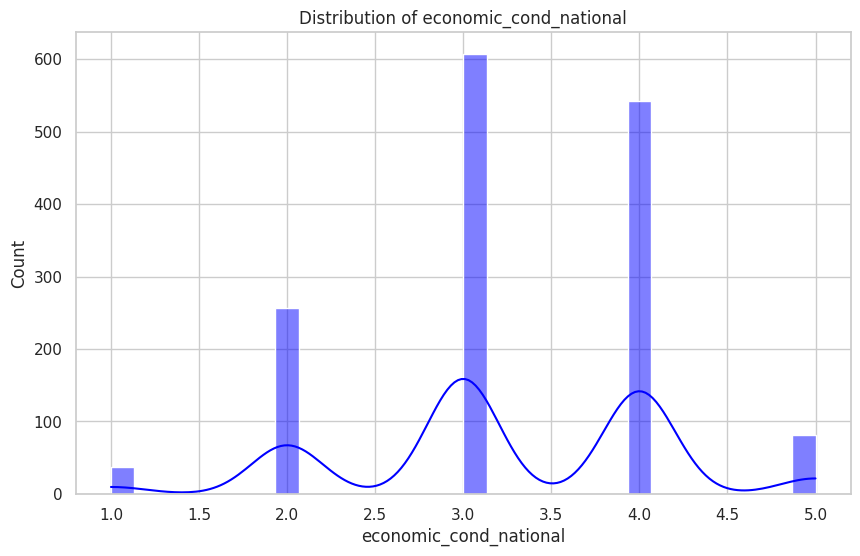


Statistics for economic_cond_household:
Skewness: -0.14940490939119963, Kurtosis: -0.20955763368399438


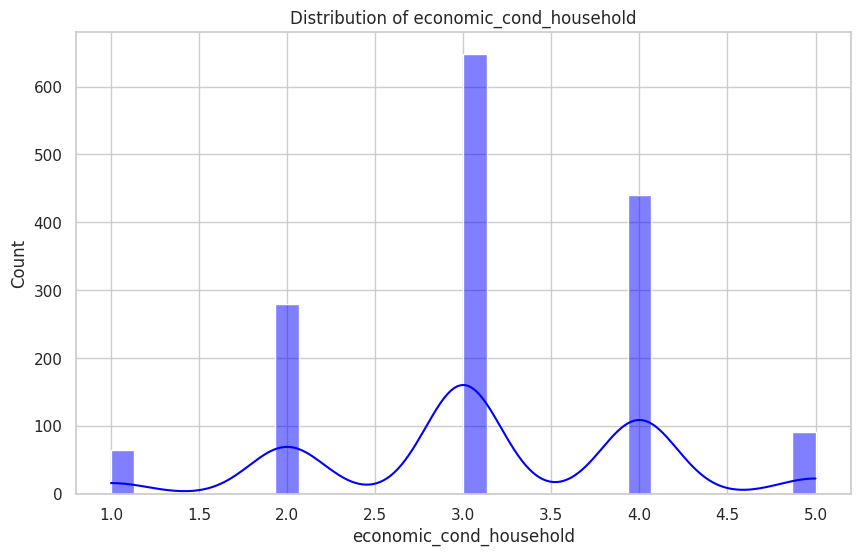


Statistics for blair:
Skewness: -0.5348918666133158, Kurtosis: -1.0660228870170225


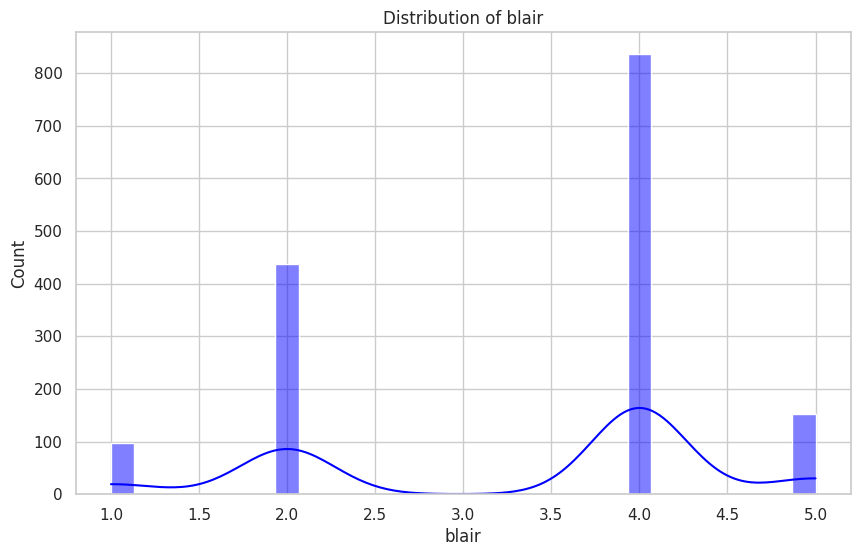


Statistics for hague:
Skewness: 0.15194998016716968, Kurtosis: -1.3911156666526612


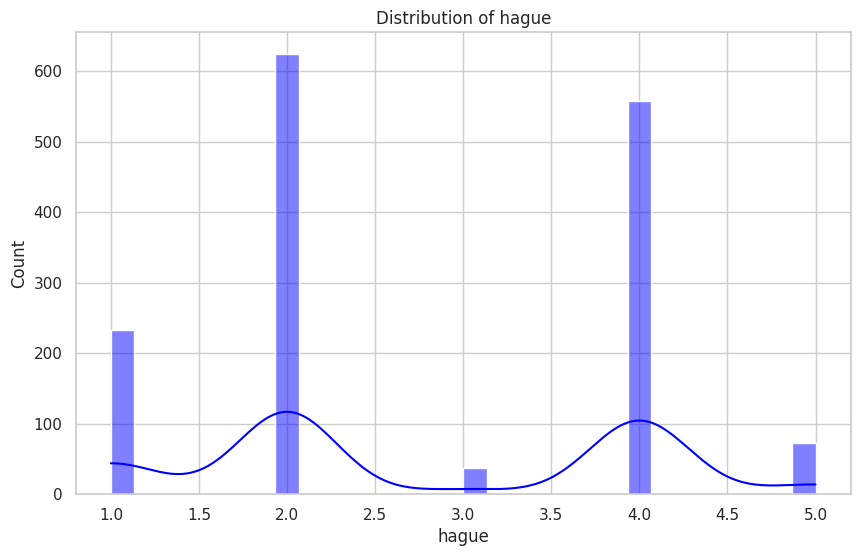


Statistics for kennedy:
Skewness: -0.3755694705431021, Kurtosis: -0.9803612605236234


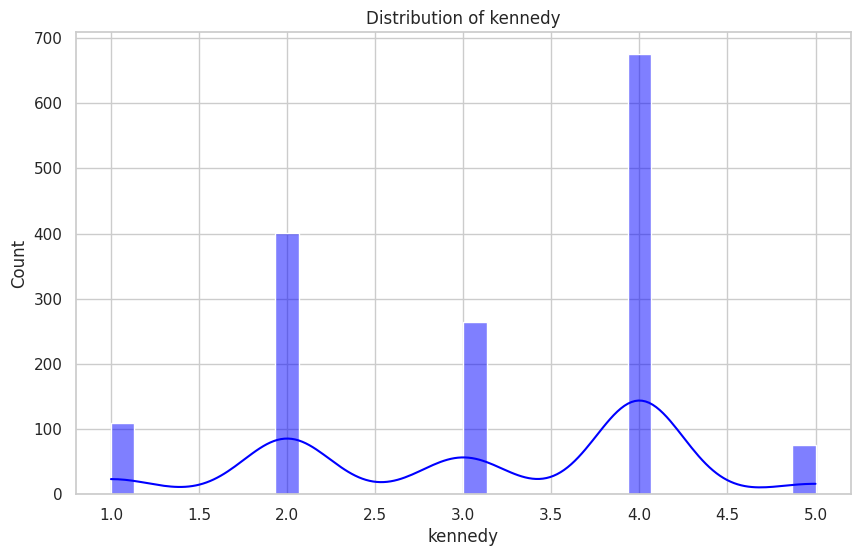


Statistics for europe:
Skewness: -0.13581295528712456, Kurtosis: -1.237717874488492


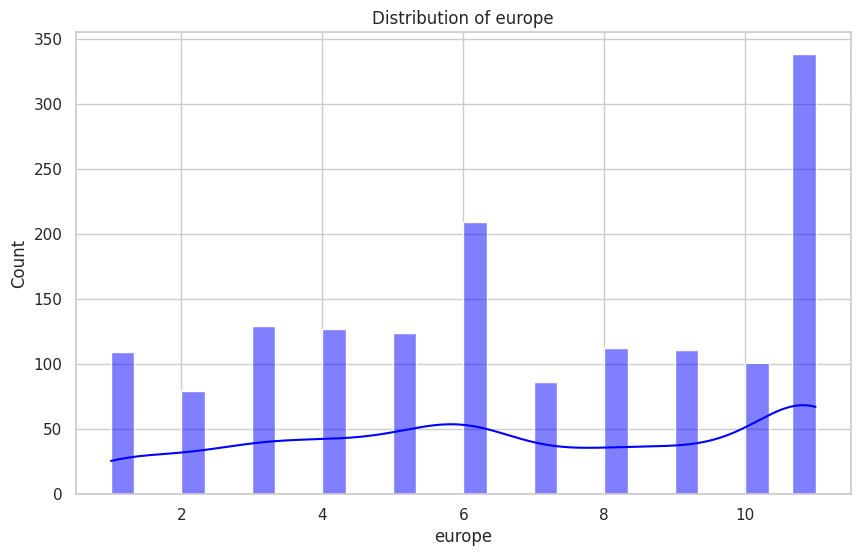


Statistics for political_knowledge:
Skewness: -0.4264178682034399, Kurtosis: -1.2165924068179326


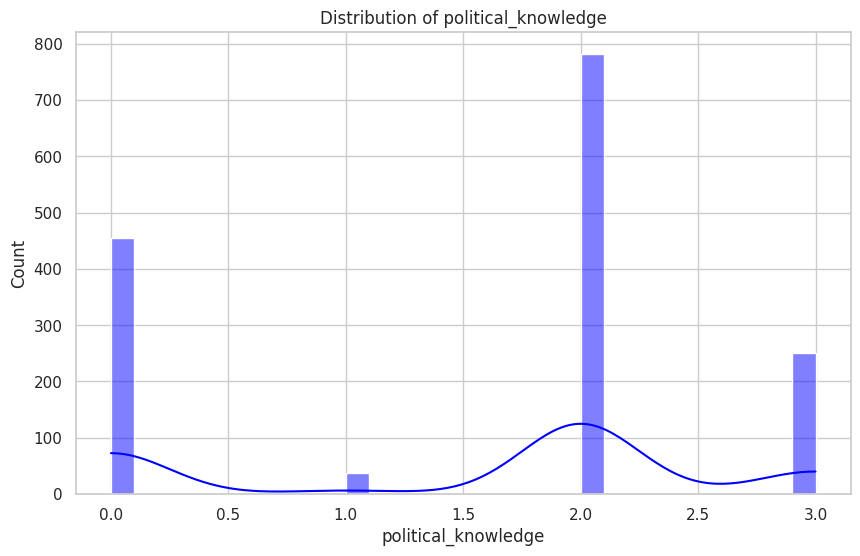


Univariate Analysis - Categorical Features

Value Counts for vote:
vote
Labour              720
Conservative        462
Liberal Democrat    343
Name: count, dtype: int64


<ipython-input-24-e6334fe4820b>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], order=data[col].value_counts().index, palette='viridis')


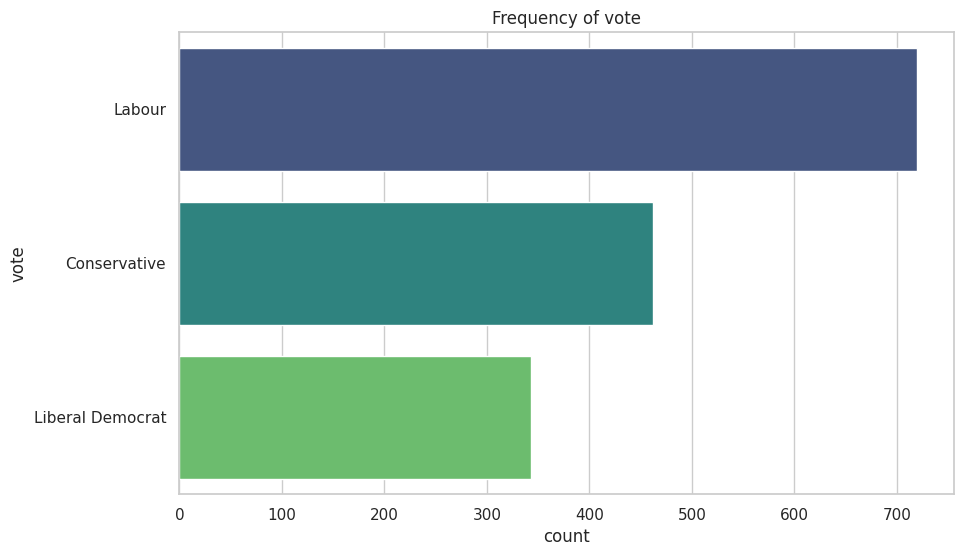


Value Counts for gender:
gender
female    812
male      713
Name: count, dtype: int64


<ipython-input-24-e6334fe4820b>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], order=data[col].value_counts().index, palette='viridis')


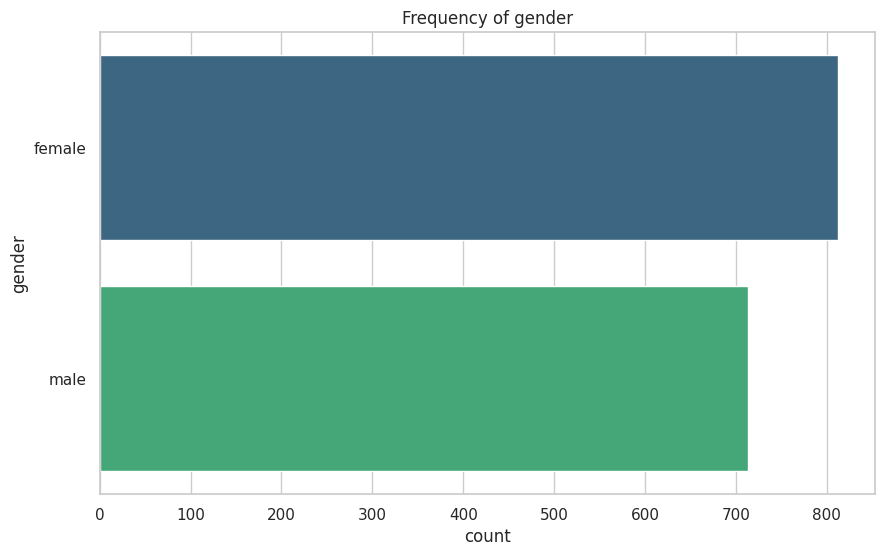

In [24]:
# Numerical Features
print("\nUnivariate Analysis - Numerical Features")
for col in data.select_dtypes(include=[np.number]).columns:
    print(f"\nStatistics for {col}:")
    print(f"Skewness: {skew(data[col])}, Kurtosis: {kurtosis(data[col])}")

    plt.figure()
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.show()

# Categorical Features
print("\nUnivariate Analysis - Categorical Features")
for col in data.select_dtypes(include=[object]).columns:
    print(f"\nValue Counts for {col}:\n{data[col].value_counts()}")

    plt.figure()
    sns.countplot(y=data[col], order=data[col].value_counts().index, palette='viridis')
    plt.title(f"Frequency of {col}")
    plt.show()



Bivariate Analysis - Correlation Matrix


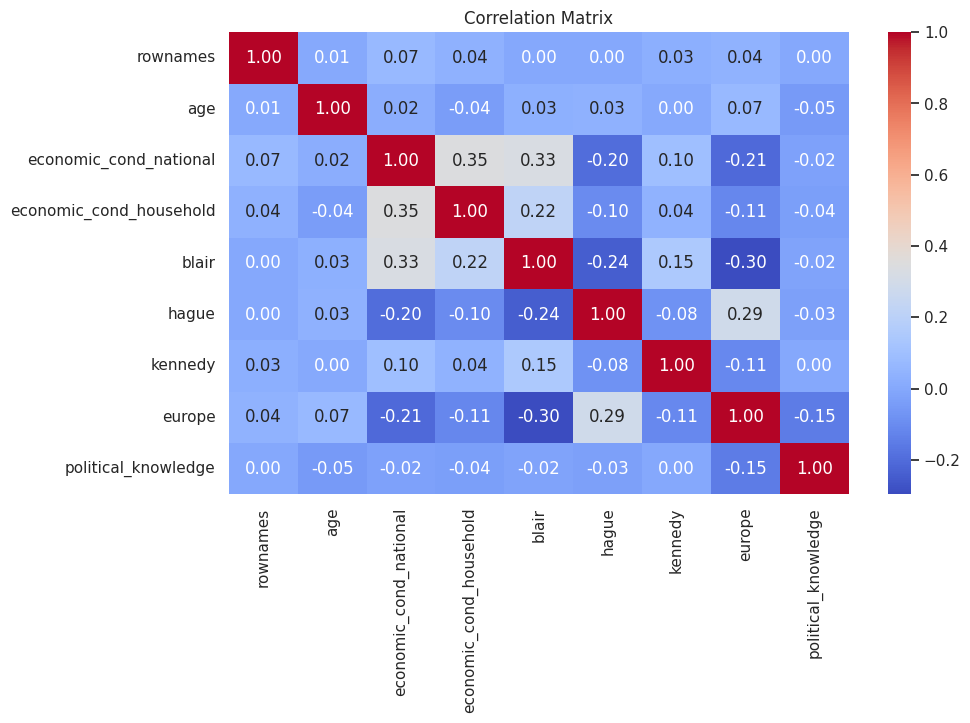

<ipython-input-25-0140496e0a26>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


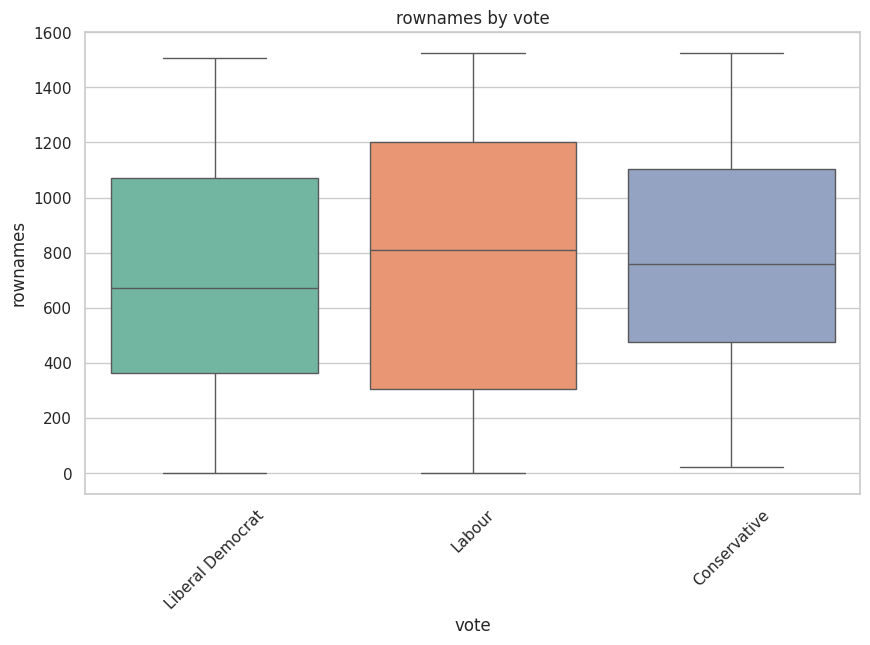

<ipython-input-25-0140496e0a26>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


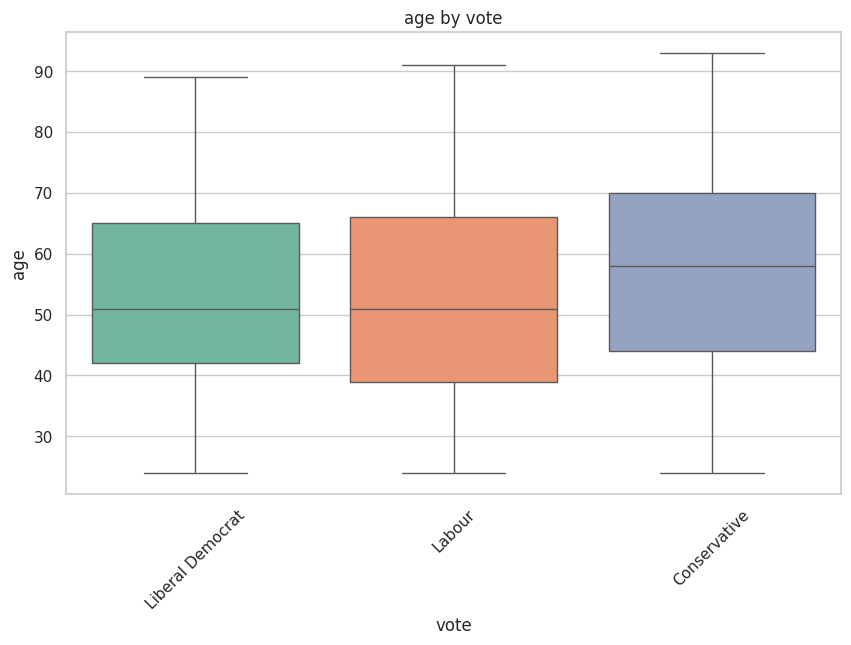

<ipython-input-25-0140496e0a26>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


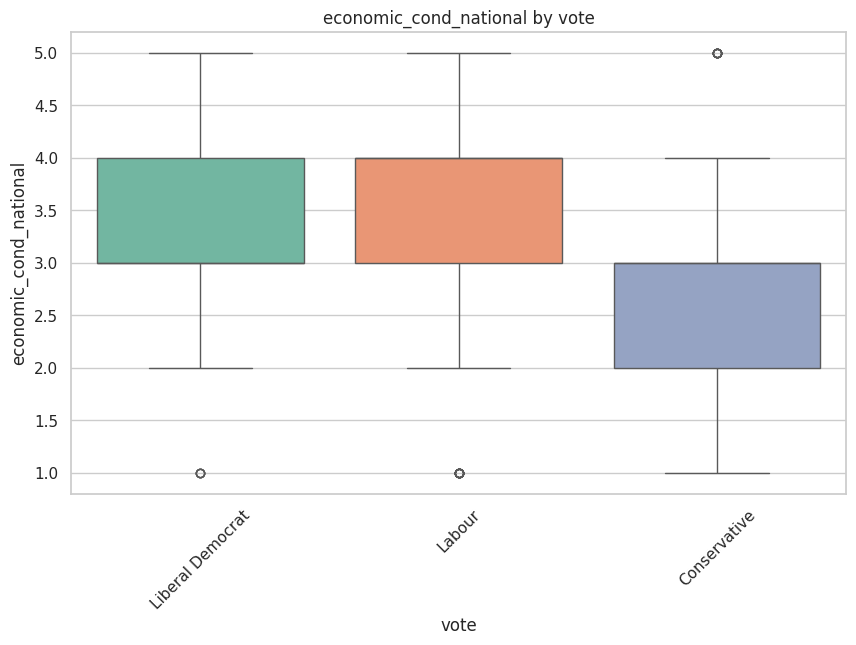

<ipython-input-25-0140496e0a26>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


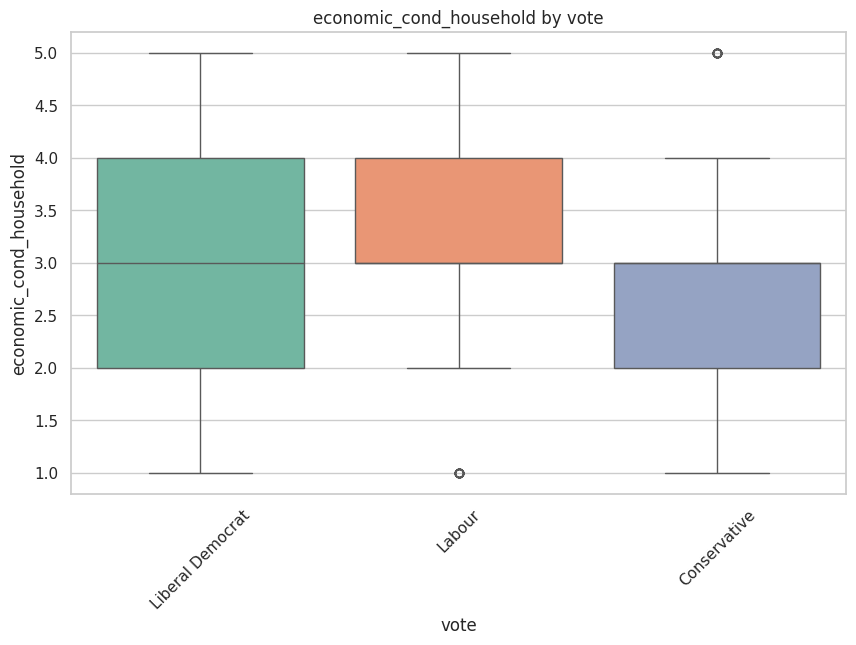

<ipython-input-25-0140496e0a26>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


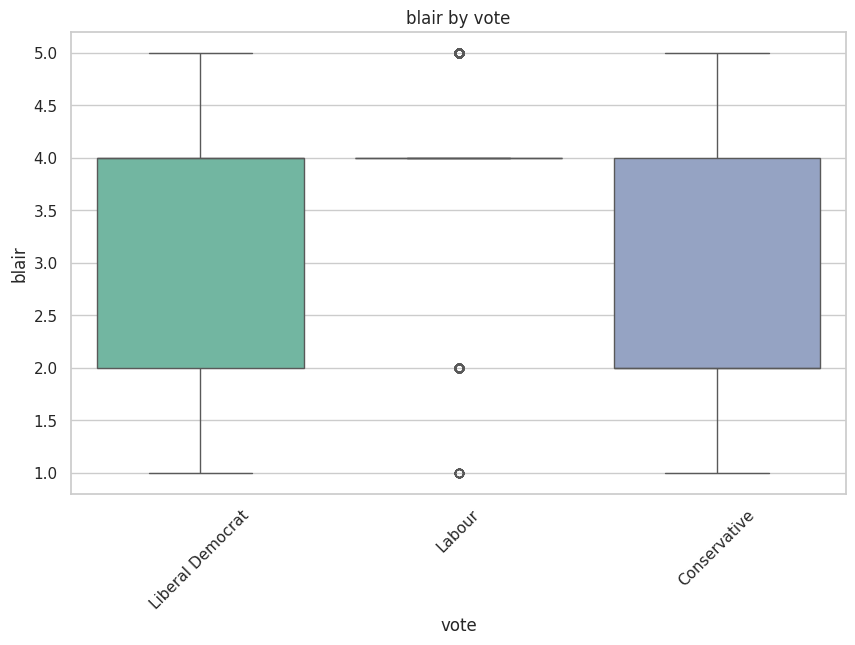

<ipython-input-25-0140496e0a26>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


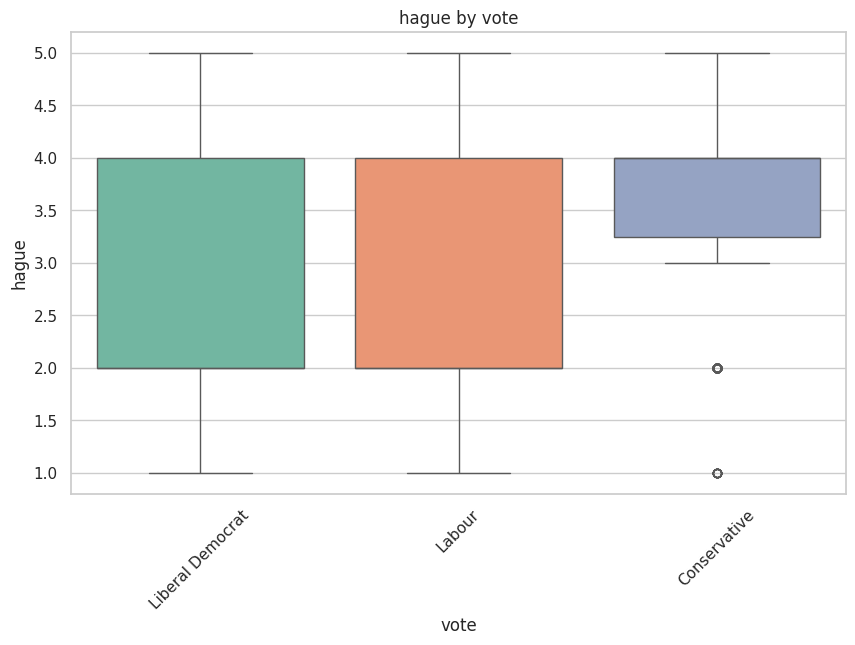

<ipython-input-25-0140496e0a26>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


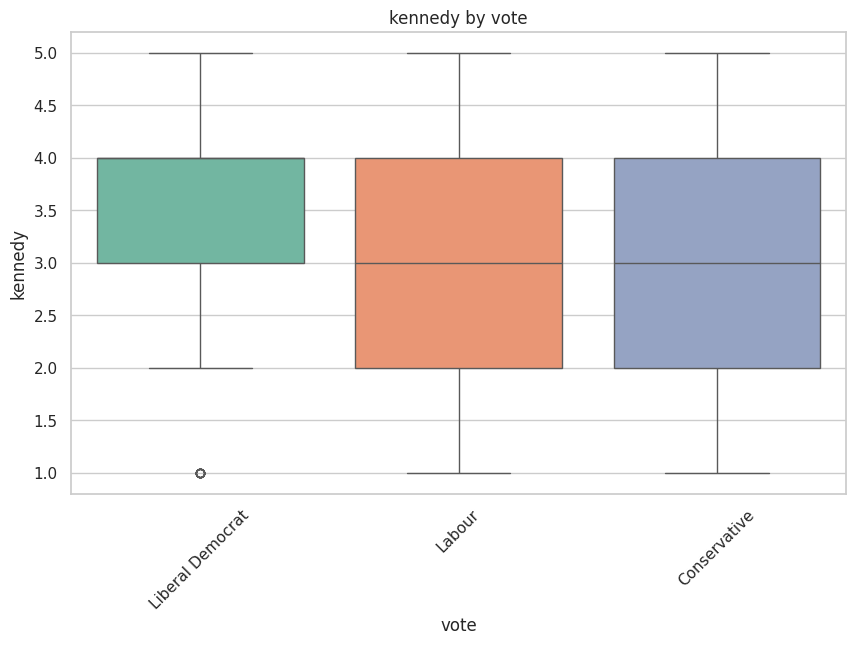

<ipython-input-25-0140496e0a26>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


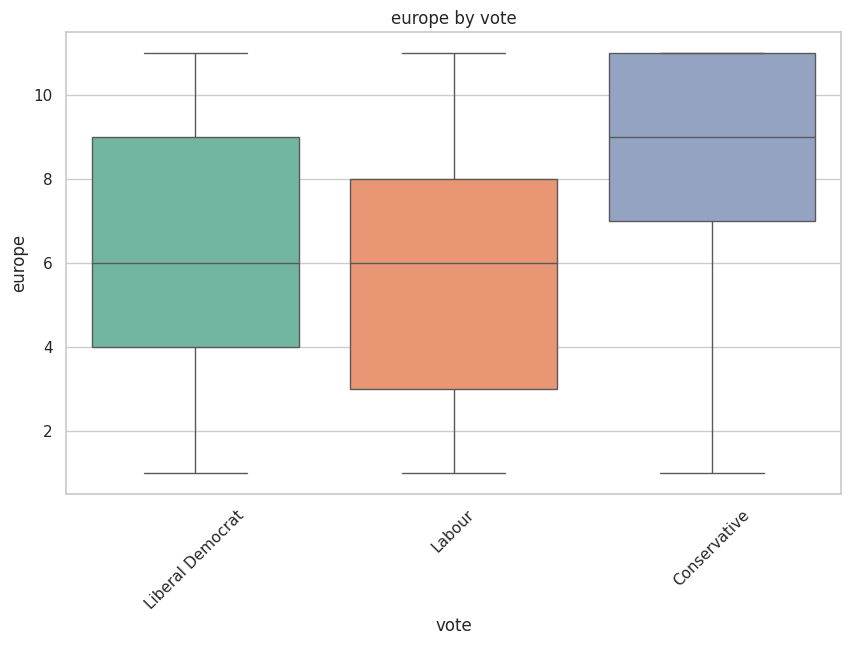

<ipython-input-25-0140496e0a26>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


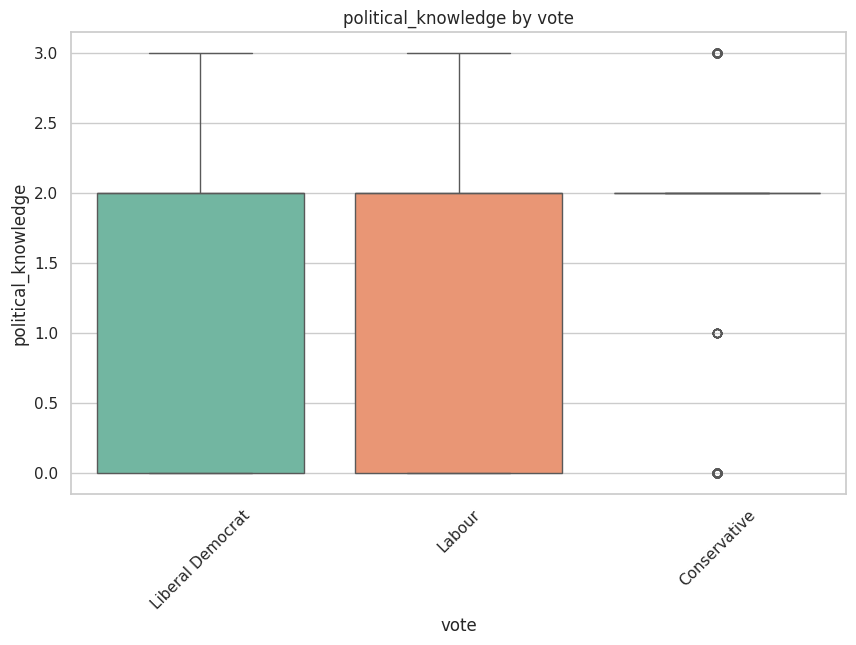

<ipython-input-25-0140496e0a26>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


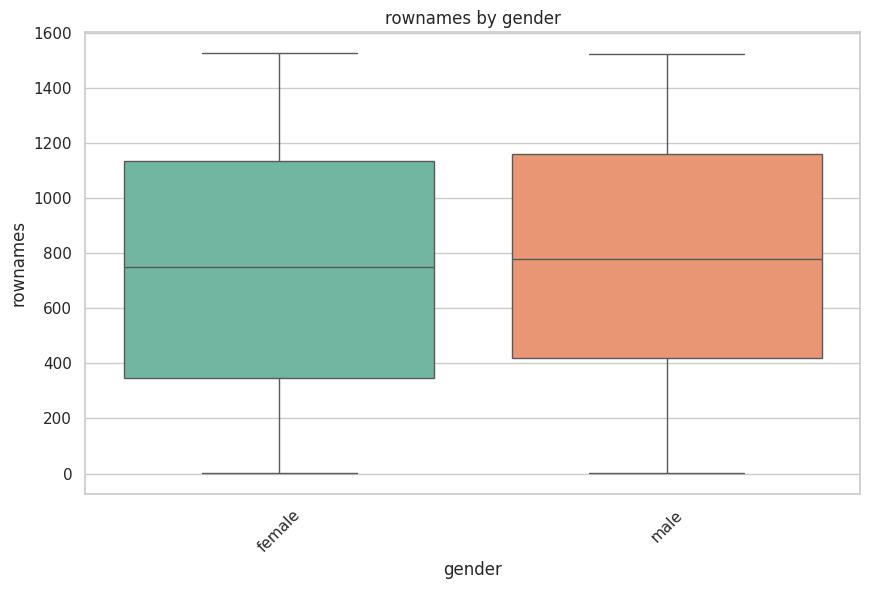

<ipython-input-25-0140496e0a26>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


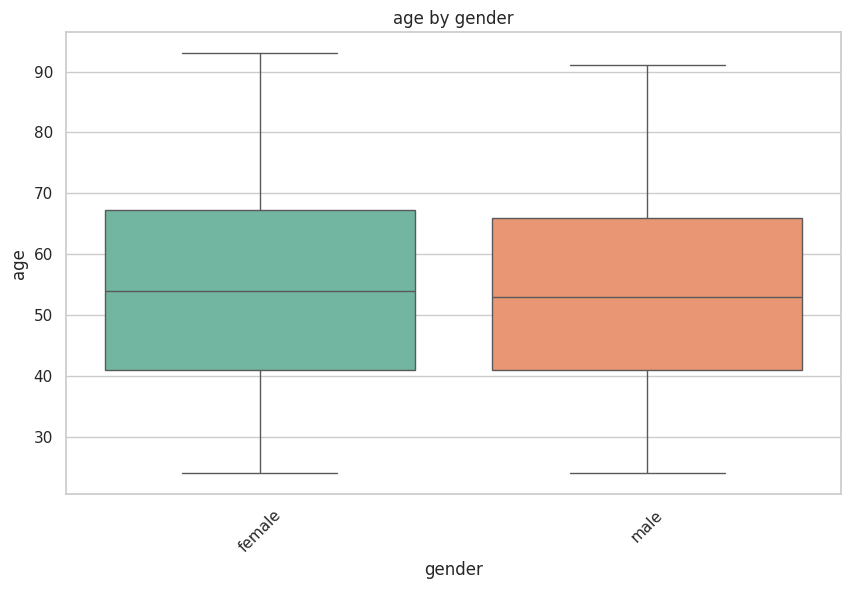

<ipython-input-25-0140496e0a26>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


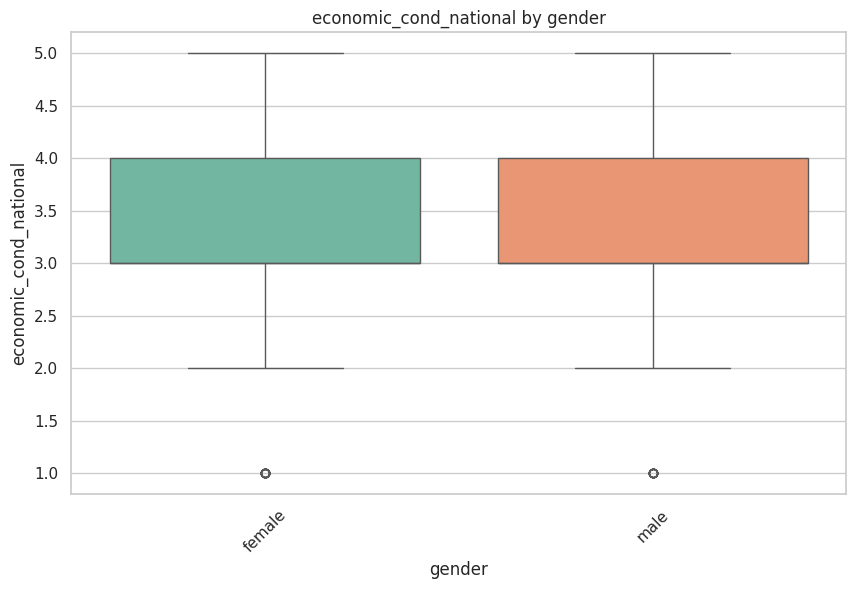

<ipython-input-25-0140496e0a26>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


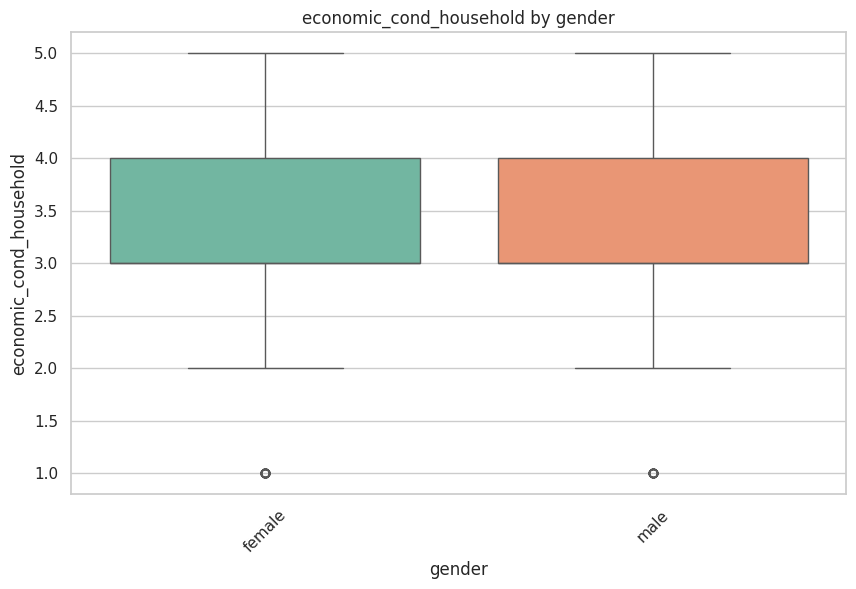

<ipython-input-25-0140496e0a26>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


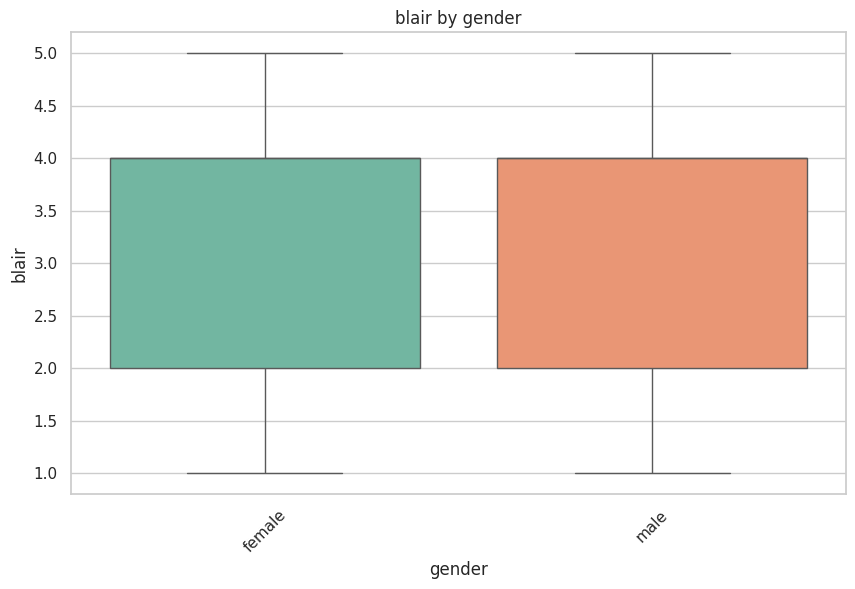

<ipython-input-25-0140496e0a26>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


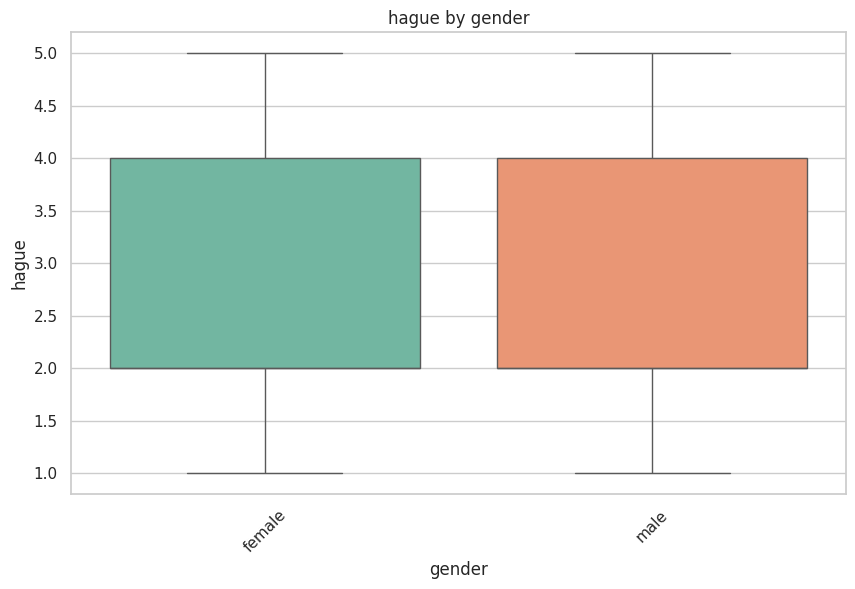

<ipython-input-25-0140496e0a26>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


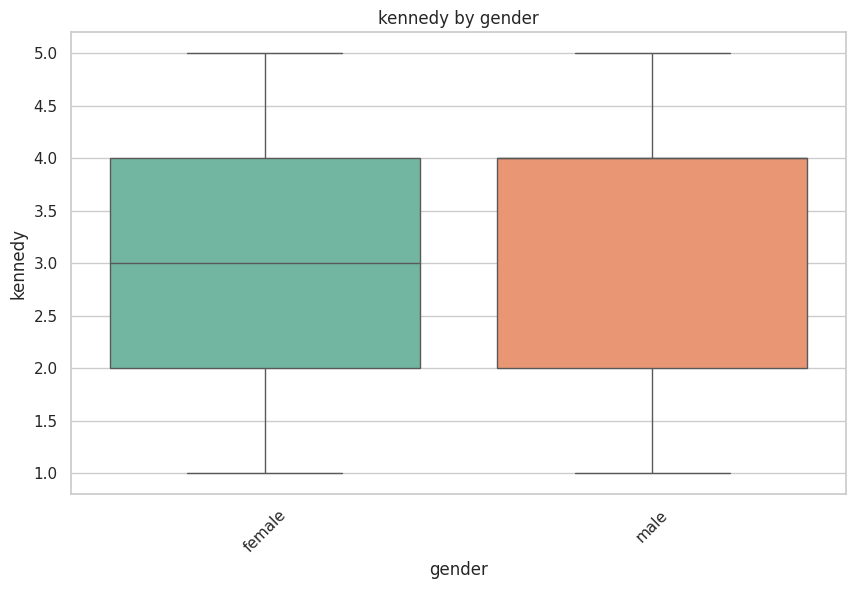

<ipython-input-25-0140496e0a26>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


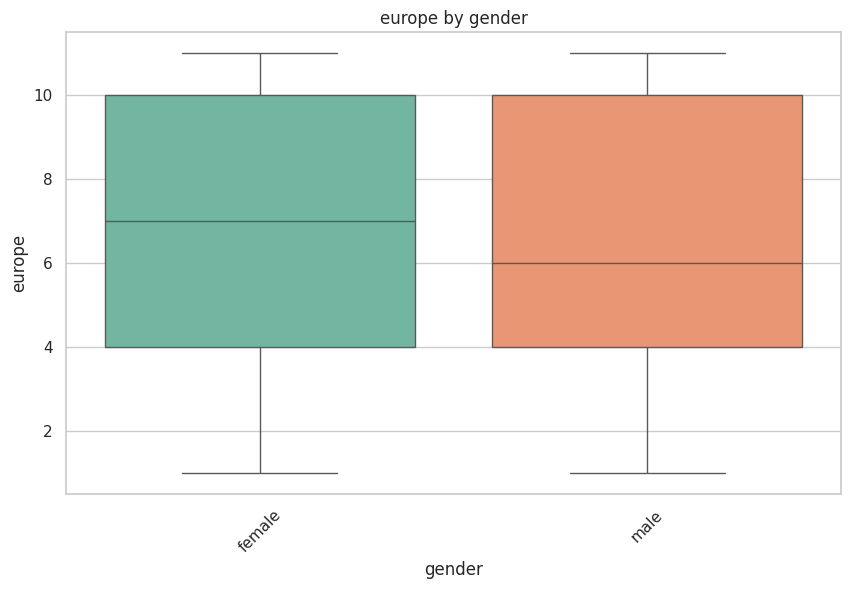

<ipython-input-25-0140496e0a26>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[num_col], palette='Set2')


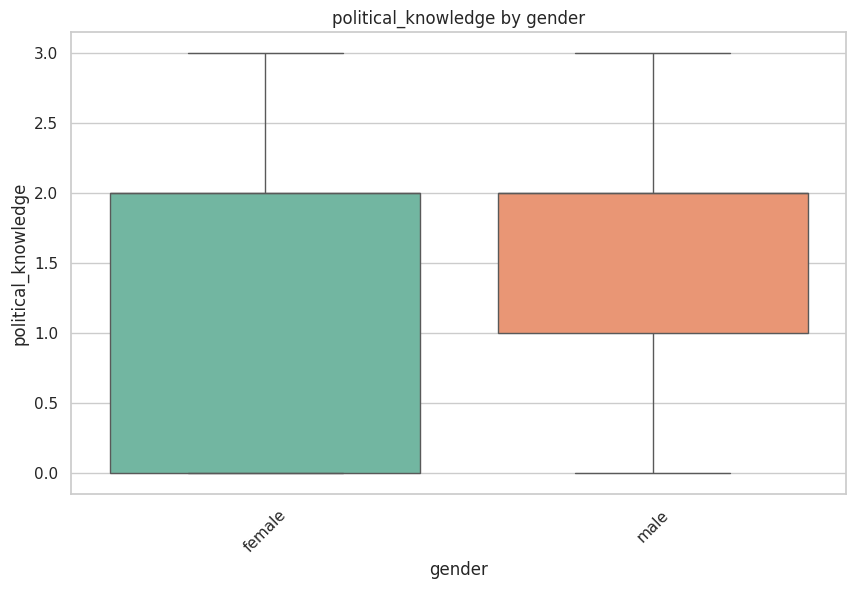

In [25]:
# Numerical vs Numerical
print("\nBivariate Analysis - Correlation Matrix")
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=[np.number])
corr_matrix = numerical_data.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Numerical vs Categorical
for col in data.select_dtypes(include=[object]).columns:
    for num_col in data.select_dtypes(include=[np.number]).columns:
        plt.figure()
        sns.boxplot(x=data[col], y=data[num_col], palette='Set2')
        plt.title(f"{num_col} by {col}")
        plt.xticks(rotation=45)
        plt.show()


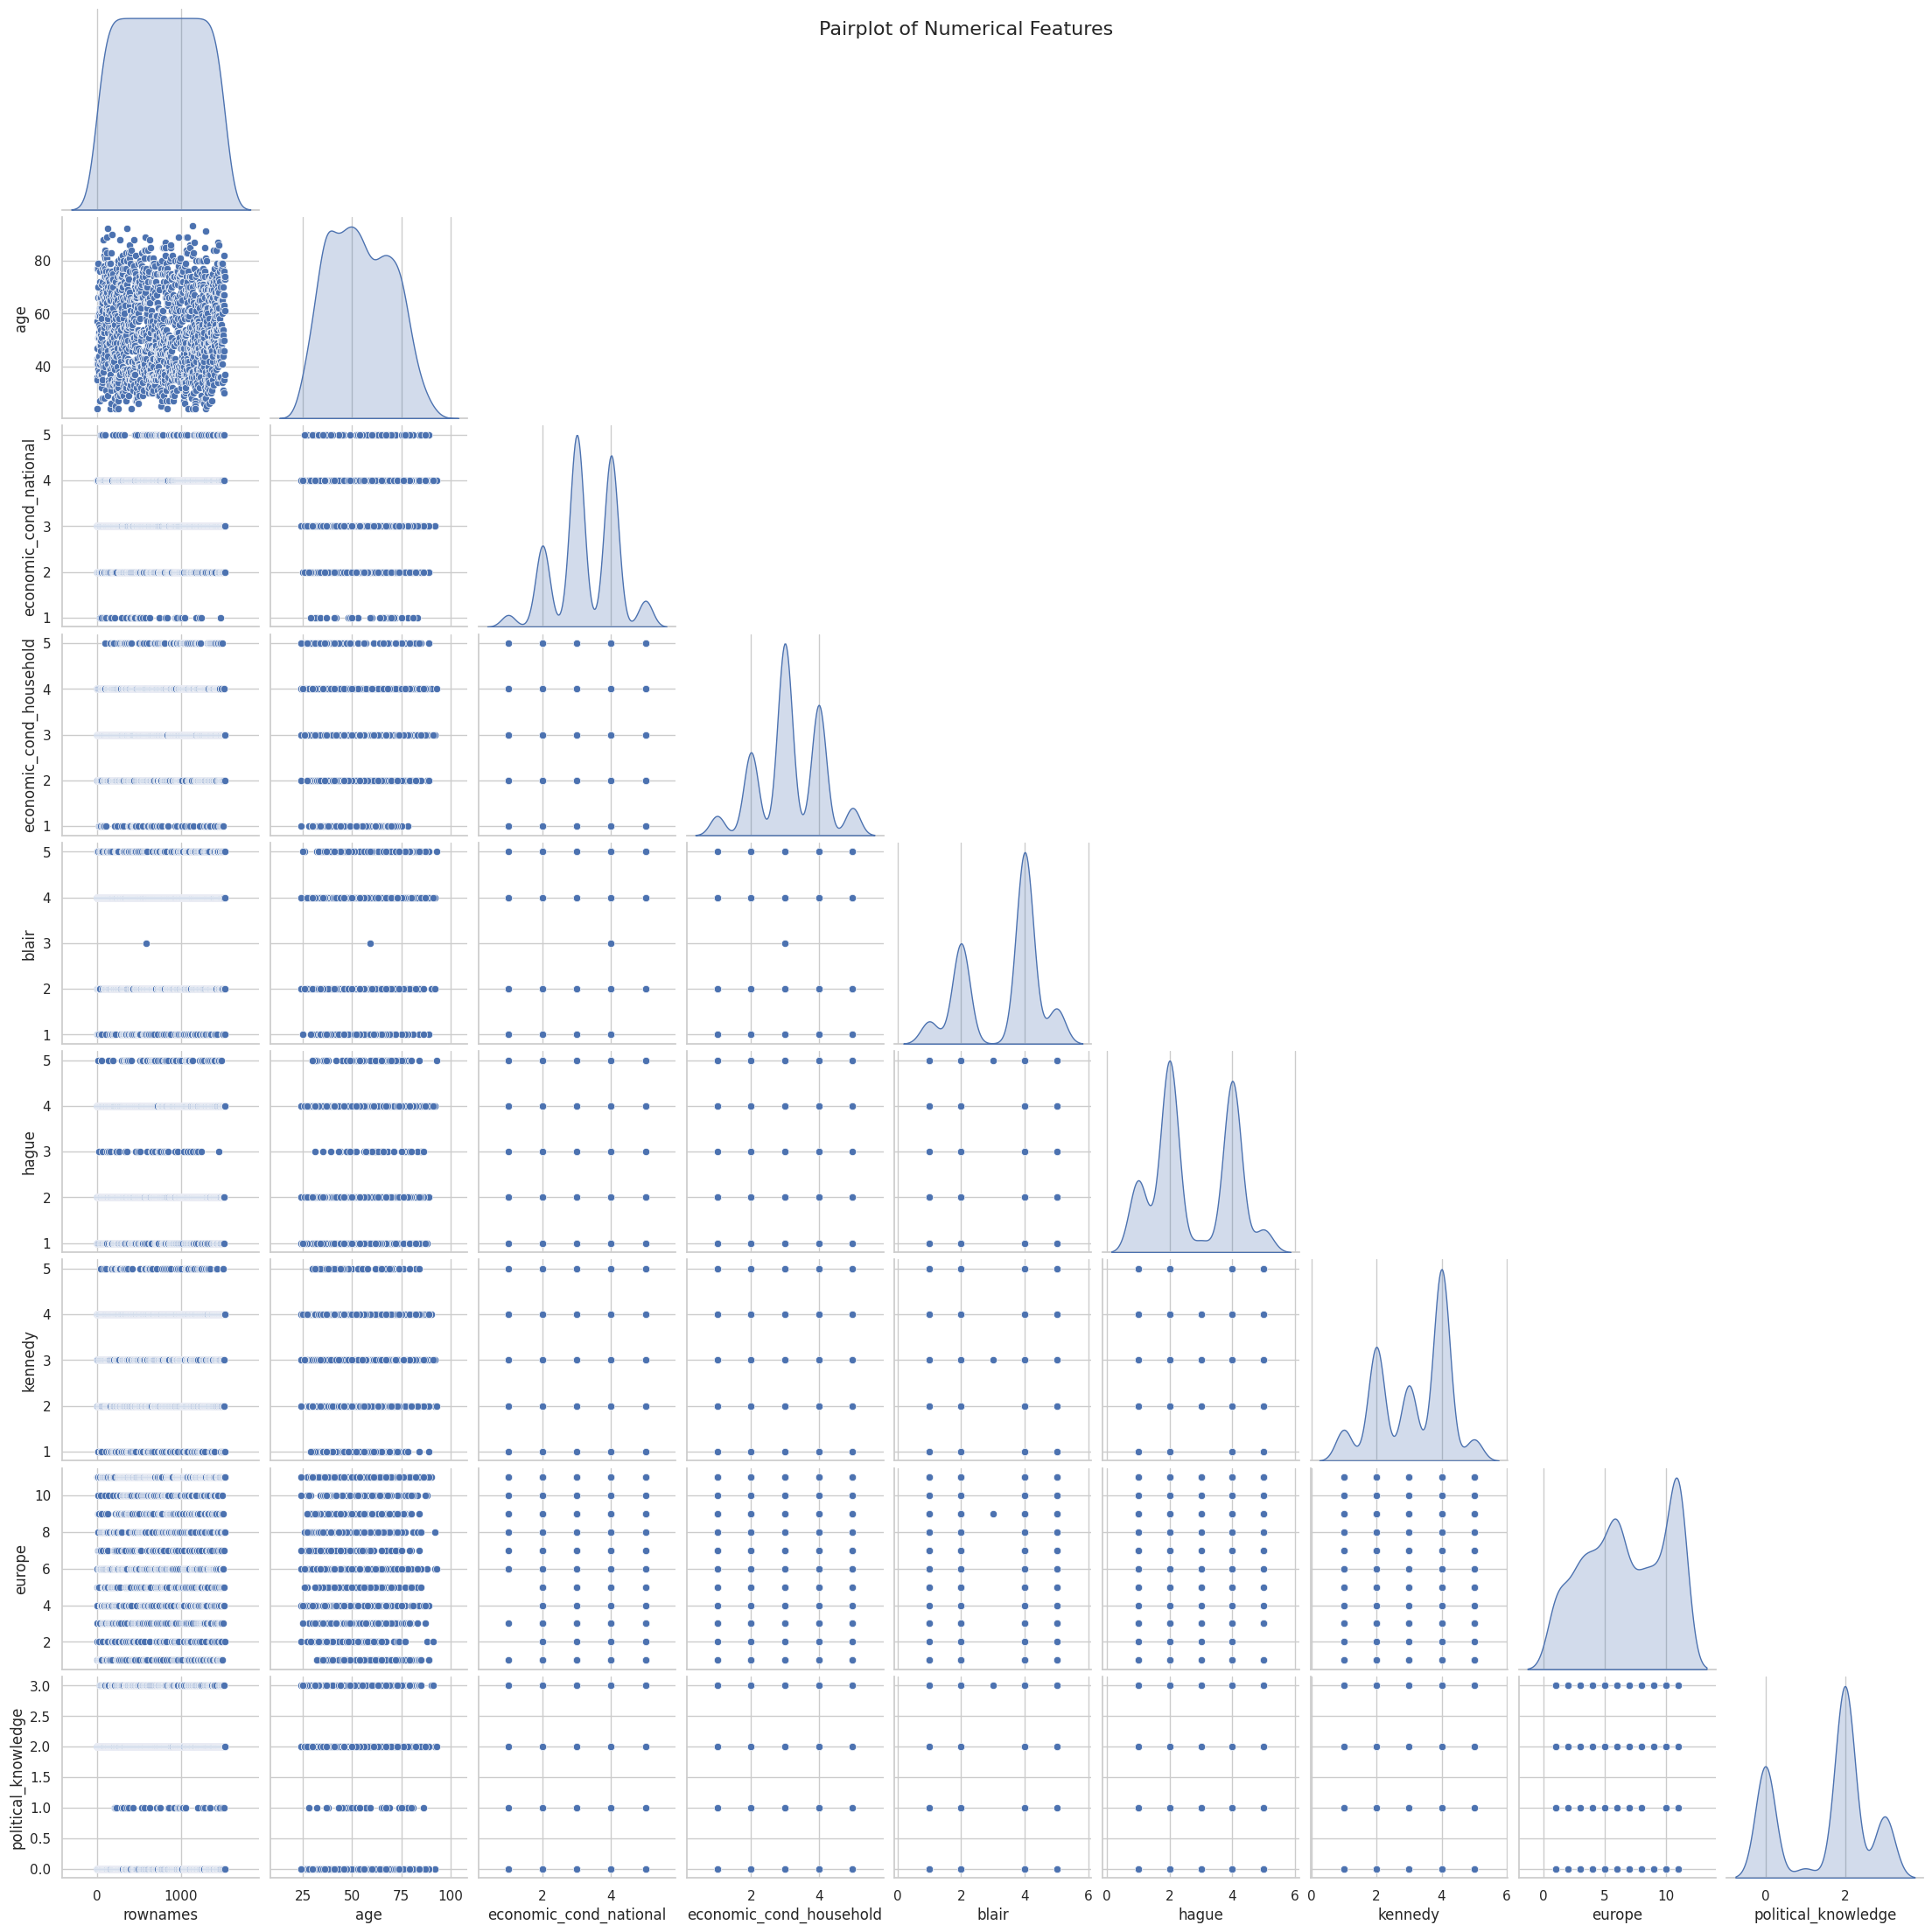

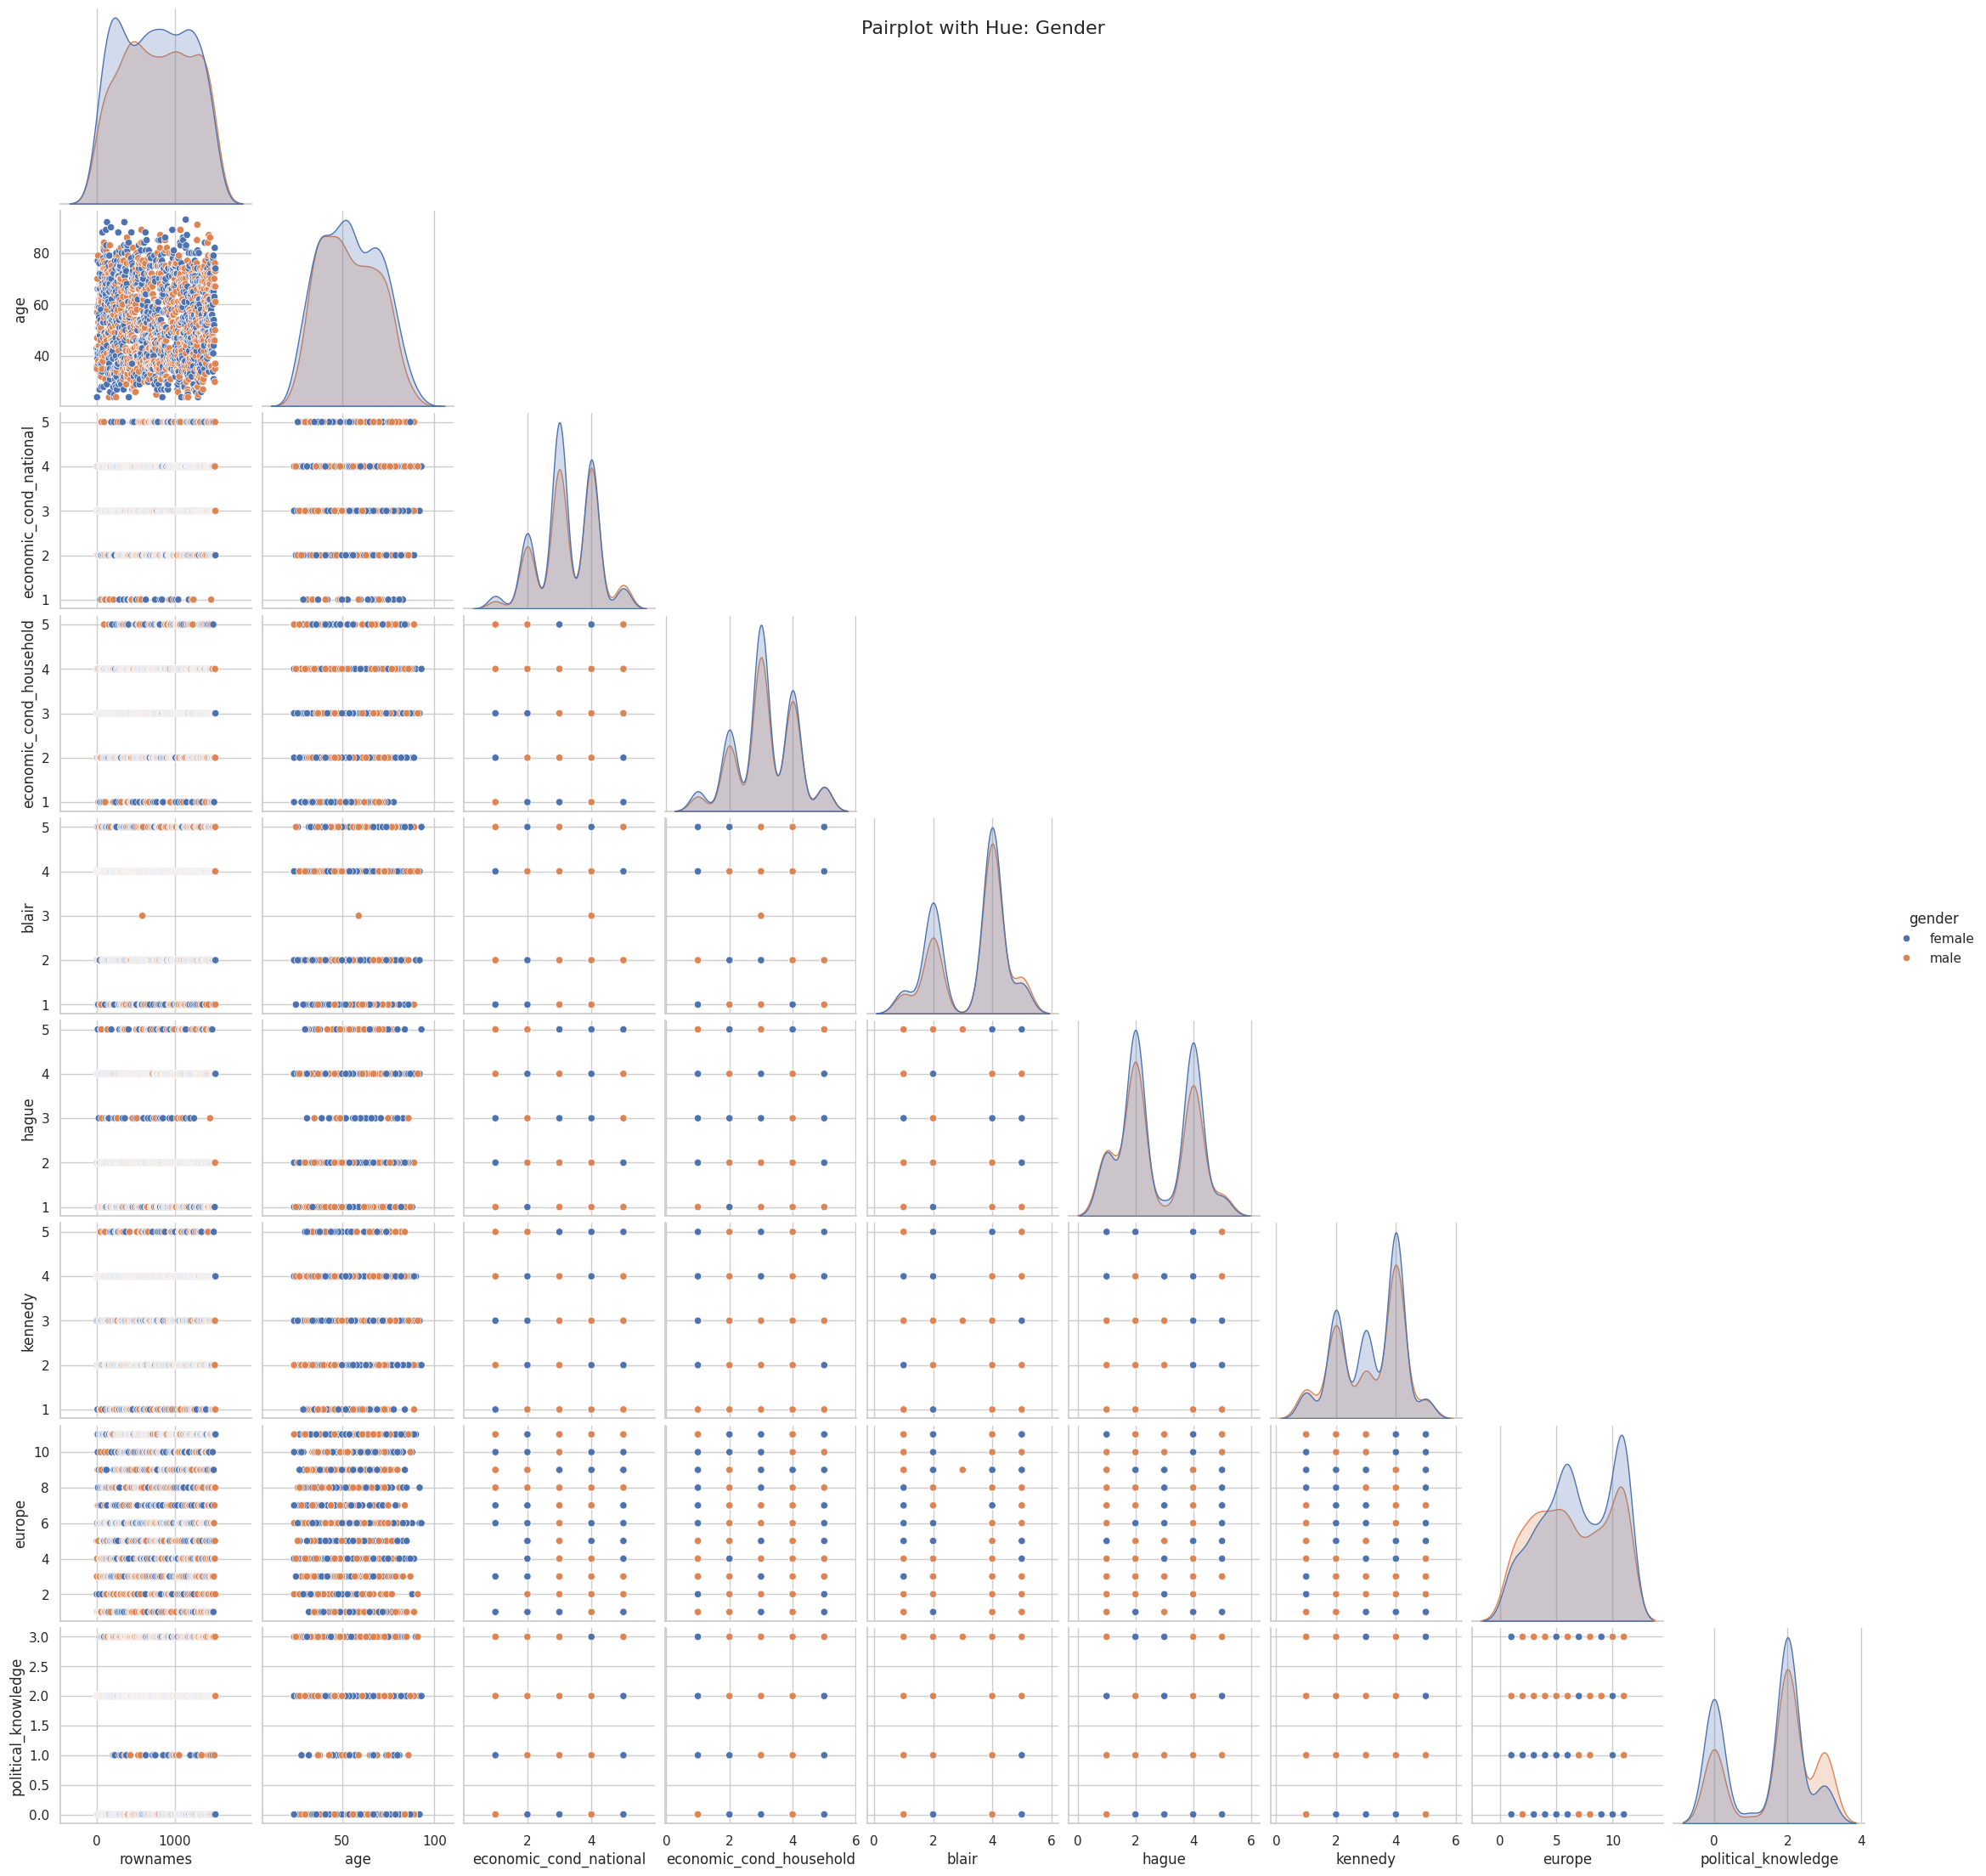

In [26]:
# Pairplot for all numerical variables
sns.pairplot(data.select_dtypes(include=[np.number]), diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Numerical Features", size=16)
plt.show()

# Pairplot with a categorical hue (if applicable)
if 'gender' in data.columns:  # Replace 'gender' with any categorical column of interest
    sns.pairplot(data, hue='gender', diag_kind='kde', corner=True)
    plt.suptitle("Pairplot with Hue: Gender", size=16)
    plt.show()


In [27]:
# Save the cleaned dataset
cleaned_file_path = "BEPS_cleaned.csv"
data.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to {cleaned_file_path}.")



Cleaned dataset saved to BEPS_cleaned.csv.
